In [23]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.model_selection import KFold

In [24]:
def GPR_wrapper(county_X, county_y, field, field_name, length_scale, target_name, save=False, save_county=None):
    selected_column = county_X[field]
    selected_column = np.array(selected_column).reshape(len(selected_column),1)
    y = county_y
    y = np.array(y).reshape(len(y),1)
    combined = np.concatenate([selected_column,y],axis=1)
    combined = combined[combined[:,0].argsort()]

    selected_column = combined[:,0]
    y = combined[:,1]
    
    l = length_scale
    sigma_f = 0.78
    sigma_n = .2

    kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
        * RBF(length_scale=l, length_scale_bounds="fixed")

    gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
    
    kf = KFold(n_splits=5)
    mse_vals = []
    for train_indices, test_indices in kf.split(selected_column):
        train_X, test_X = selected_column[train_indices], selected_column[test_indices]
        train_y, test_y = y[train_indices], y[test_indices]
        
        gpr.fit(train_X.reshape(-1, 1), train_y)
        y_pred_samples = gpr.sample_y(test_X.reshape(-1, 1), n_samples=20)
        pred_y = np.apply_over_axes(func=np.mean, a=y_pred_samples, axes=1).squeeze()
        pred_y = np.array(pred_y)
    
        mse = ((test_y - pred_y)**2).mean()
        mse_vals.append(mse)
    print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))
    
    gpr.fit(selected_column.reshape(-1, 1), y)
    
    print("Kernel Used: {}".format(gpr.kernel_))
    
    x_range = np.linspace(min(selected_column),max(selected_column),100)
    y_hat_samples = gpr.sample_y(x_range.reshape(-1, 1), n_samples=20)
    y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
    y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()
    
    y_hat_sd_arr = np.array(y_hat_sd)
    y_hat_arr = np.array(y_hat)
    
    fig = plt.subplots(figsize=(15,6))

    plt.plot(x_range, y_hat,color='red')
    plt.fill_between(x_range,y_hat_arr-y_hat_sd_arr,y_hat_arr+y_hat_sd_arr,alpha=0.2,color='red')
    plt.scatter(selected_column,y,color='k',s=8)

    plt.xlabel(field_name,fontsize=22,labelpad=10)
    plt.ylabel(target_name,fontsize=22,labelpad=12)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    if save:
        plt.title(save_county,fontsize=24,weight='bold')
        plt.savefig("{}_GPR_{}_{}.png".format(save_county, field_name, target_name))
    
    plt.show()

# Population Not Staying Home

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Cross-validated MSE: 0.017458840166606645
0.495**2 * RBF(length_scale=40)


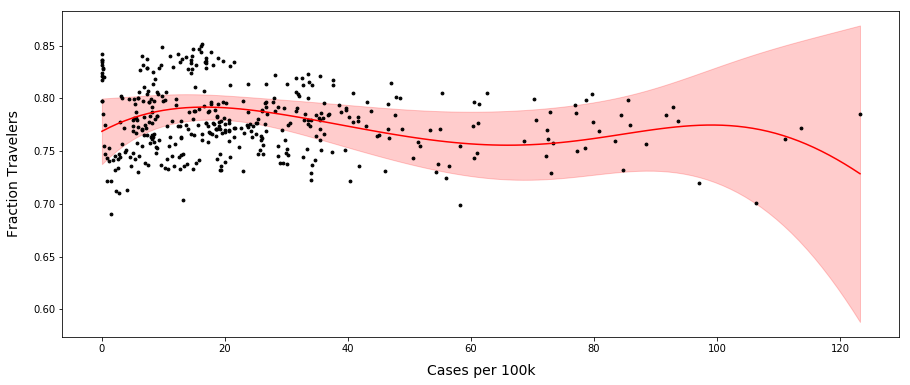

Cross-validated MSE: 0.033706983857593985
0.497**2 * RBF(length_scale=2e+03)


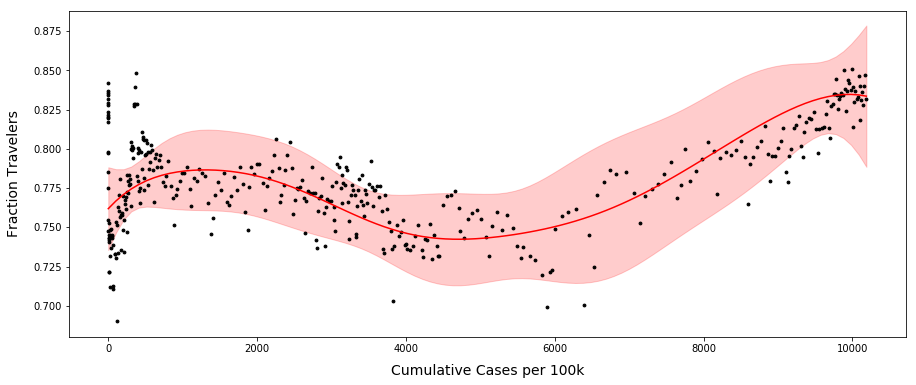

Cross-validated MSE: 0.013823946404352078
0.501**2 * RBF(length_scale=40)


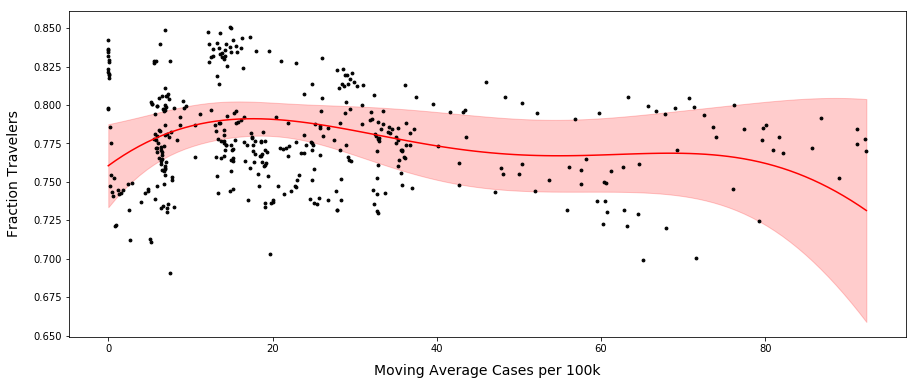

Cross-validated MSE: 0.02647950307869116
0.51**2 * RBF(length_scale=0.5)


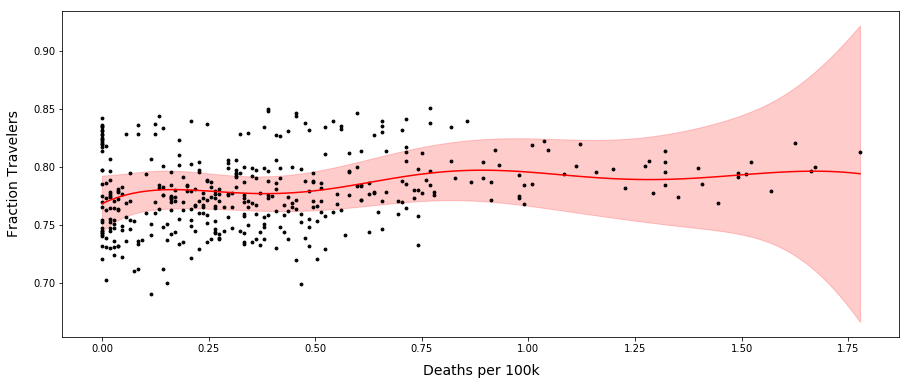

Cross-validated MSE: 0.031155026310550525
0.498**2 * RBF(length_scale=40)


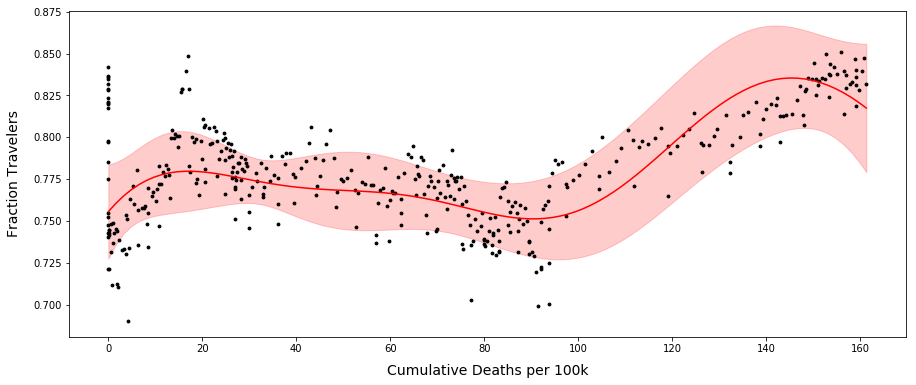

Cross-validated MSE: 0.09044079928131471
0.501**2 * RBF(length_scale=0.2)


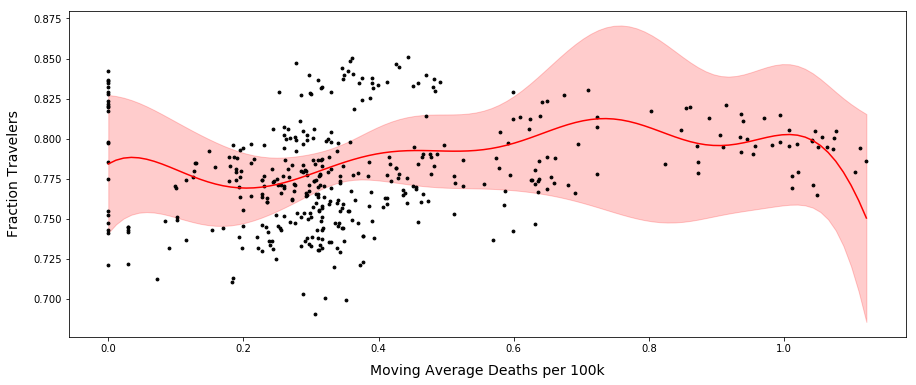

In [5]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")
state_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(state_X.columns)):
    GPR_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_length_scales[i], "Fraction Travelers")

0.462**2 * RBF(length_scale=40)


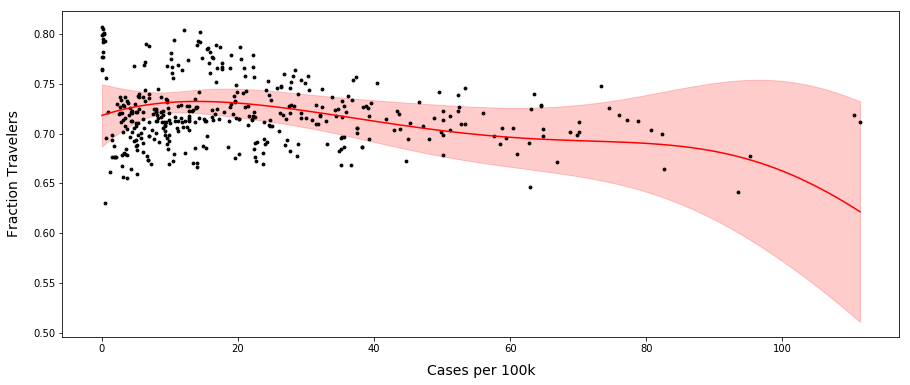

0.467**2 * RBF(length_scale=2e+03)


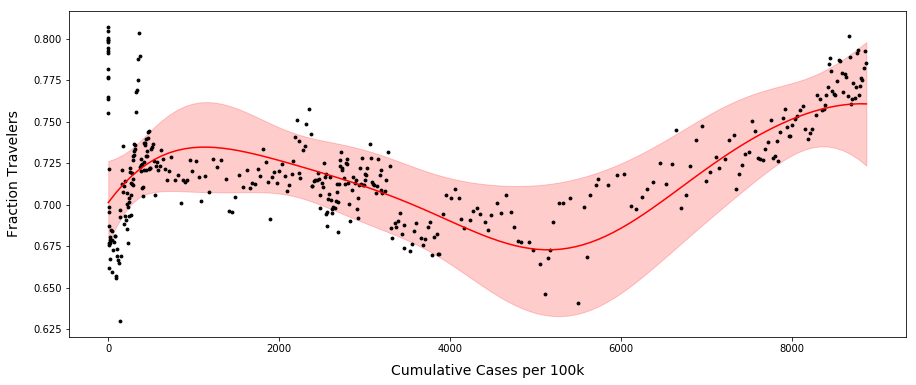

0.47**2 * RBF(length_scale=40)


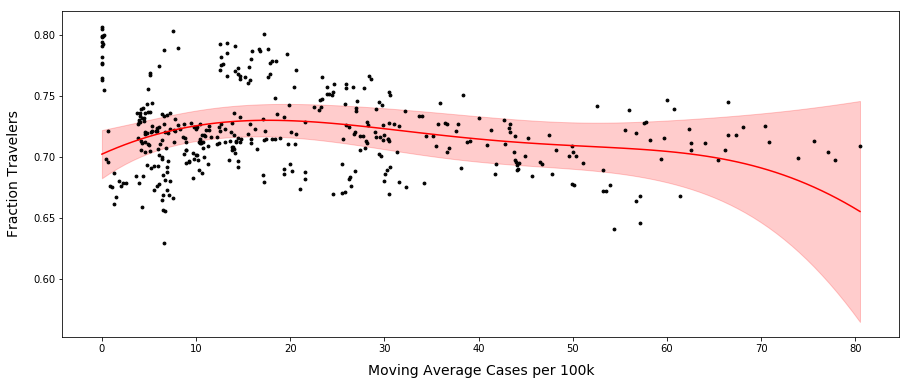

0.478**2 * RBF(length_scale=0.5)


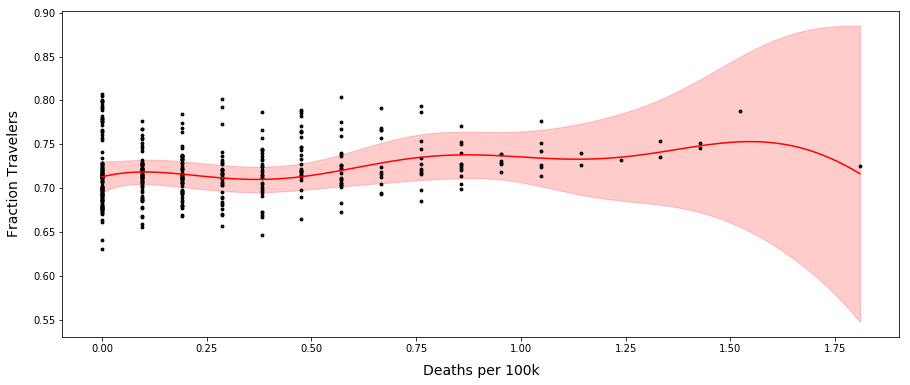

0.477**2 * RBF(length_scale=40)


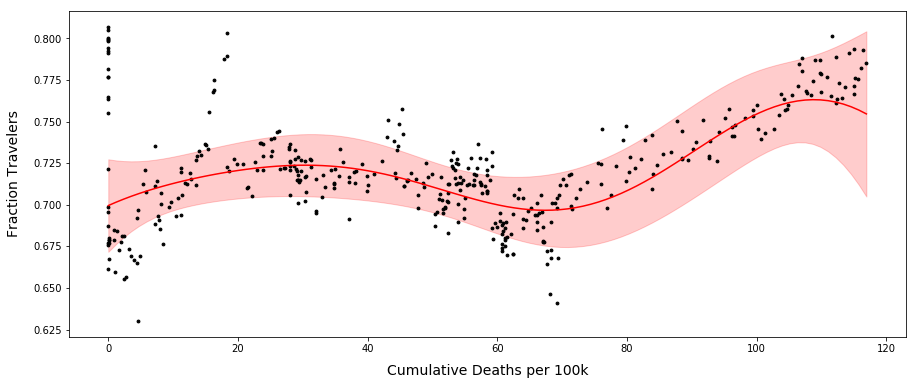

0.472**2 * RBF(length_scale=0.2)


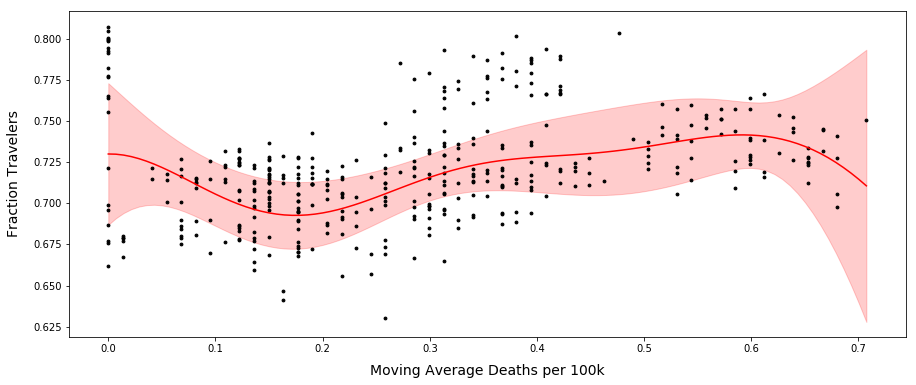

In [5]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")
fulton_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(fulton_X.columns)):
    GPR_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_length_scales[i], "Fraction Travelers")

0.516**2 * RBF(length_scale=40)


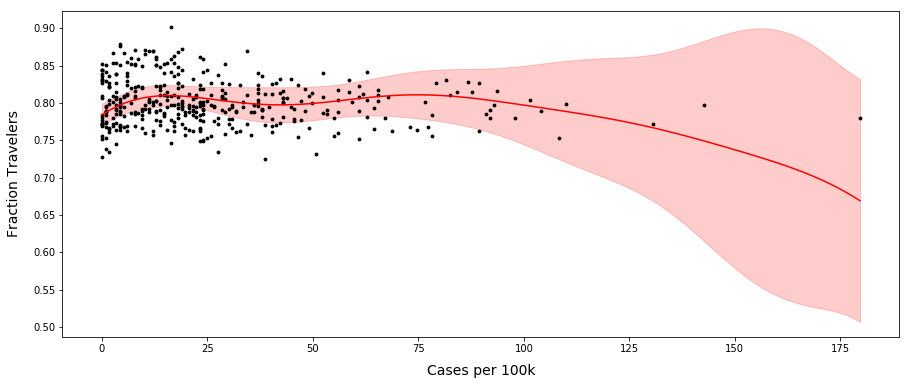

0.508**2 * RBF(length_scale=2e+03)


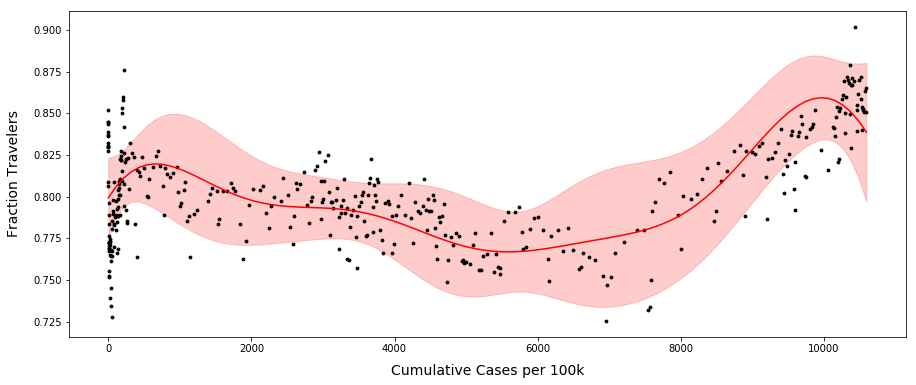

0.506**2 * RBF(length_scale=40)


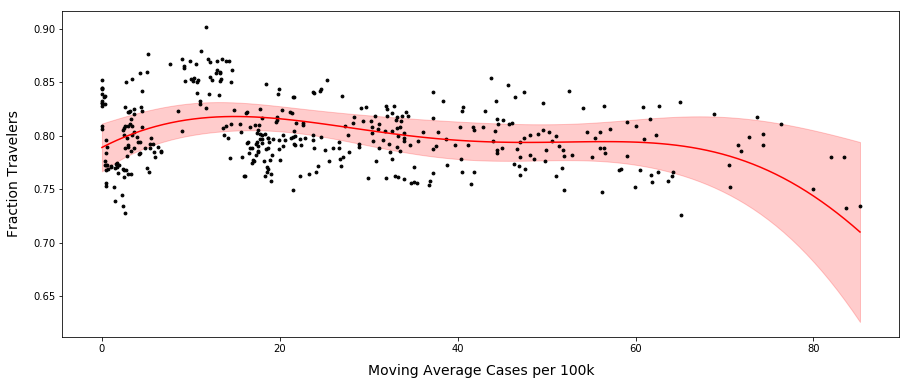

0.684**2 * RBF(length_scale=0.5)


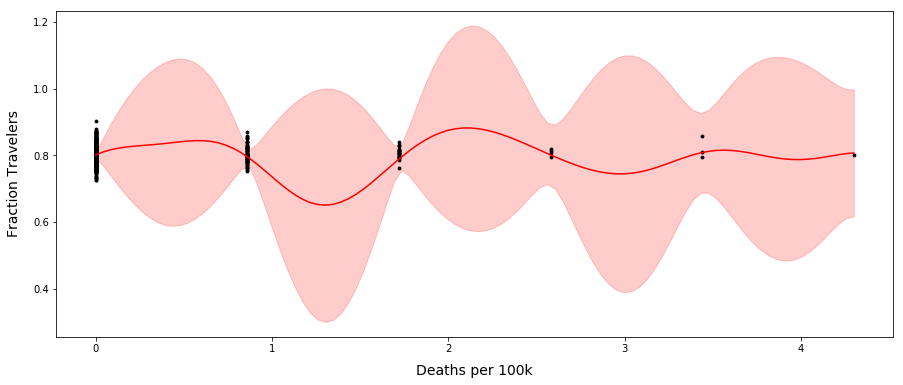

0.54**2 * RBF(length_scale=40)


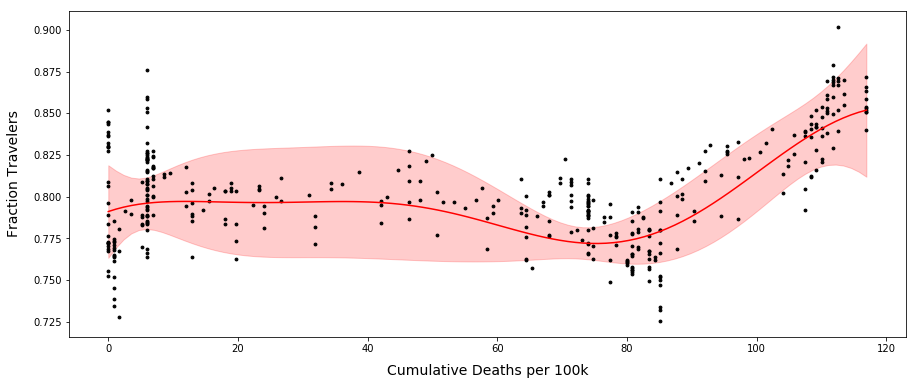

0.516**2 * RBF(length_scale=0.2)


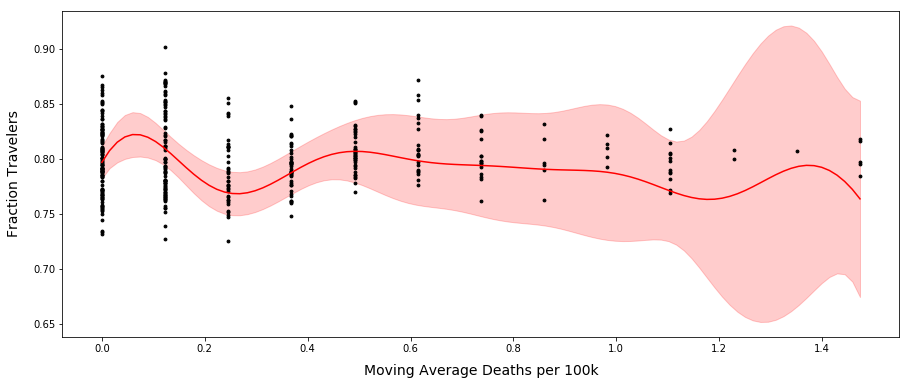

In [6]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Population")
lowndes_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(lowndes_X.columns)):
    GPR_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_length_scales[i], "Fraction Travelers")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0057242390633315075
Kernel Used: 0.507**2 * RBF(length_scale=40)


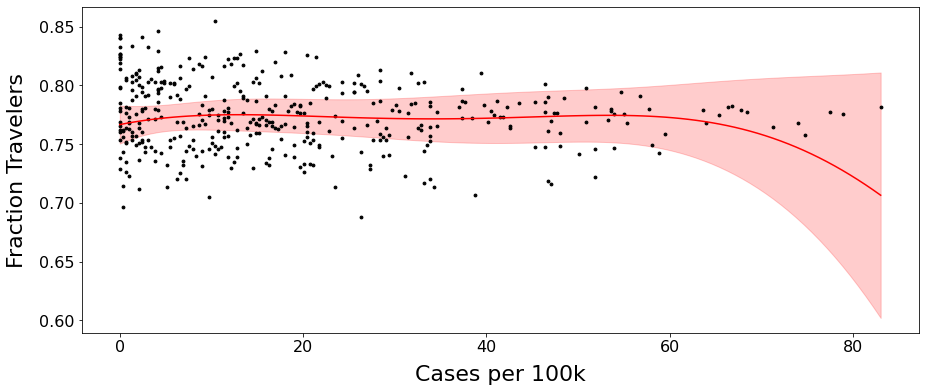

Cross-validated MSE: 0.018612646590217843
Kernel Used: 0.499**2 * RBF(length_scale=2e+03)


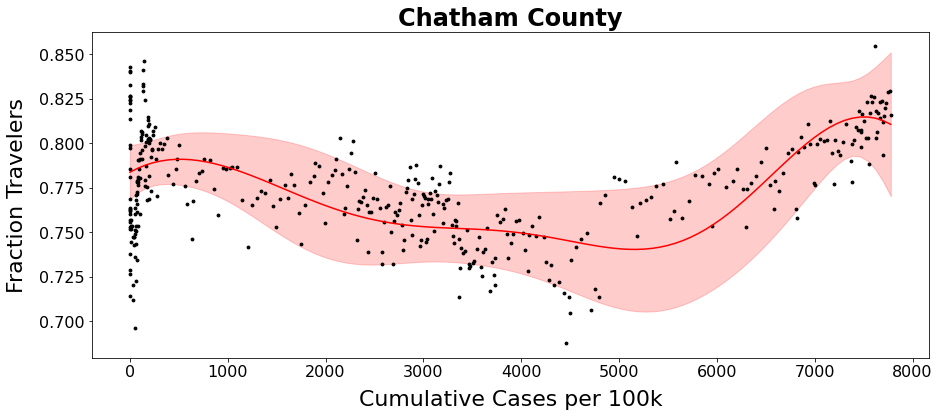

Cross-validated MSE: 0.0024045012503171497
Kernel Used: 0.526**2 * RBF(length_scale=40)


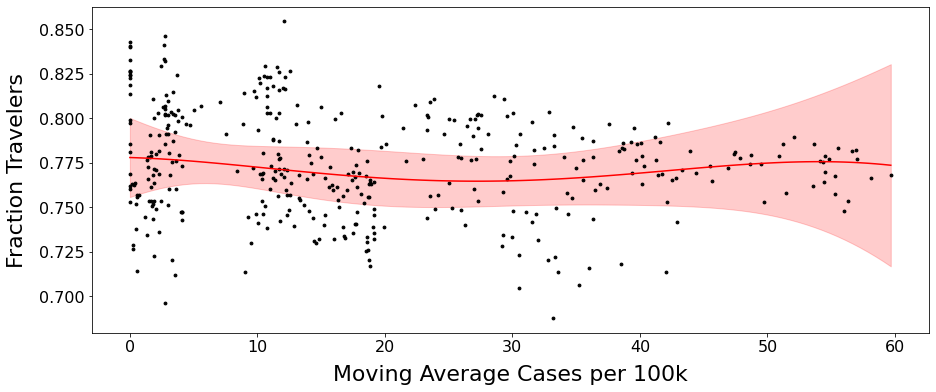

Cross-validated MSE: 0.033599905667593334
Kernel Used: 0.529**2 * RBF(length_scale=0.5)


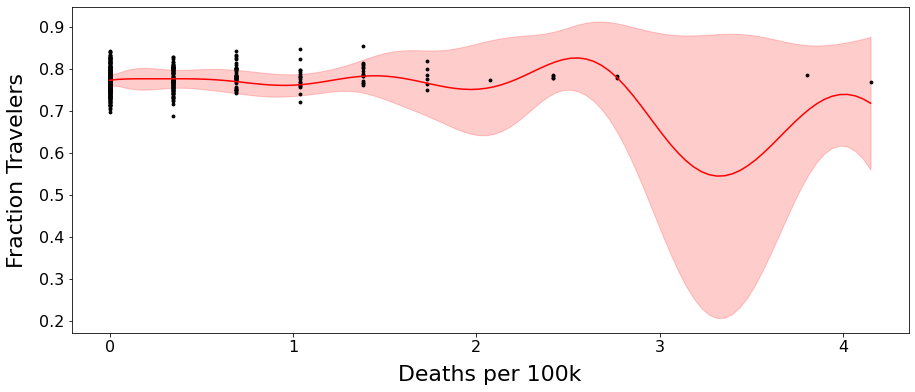

Cross-validated MSE: 0.01992807590668972
Kernel Used: 0.497**2 * RBF(length_scale=40)


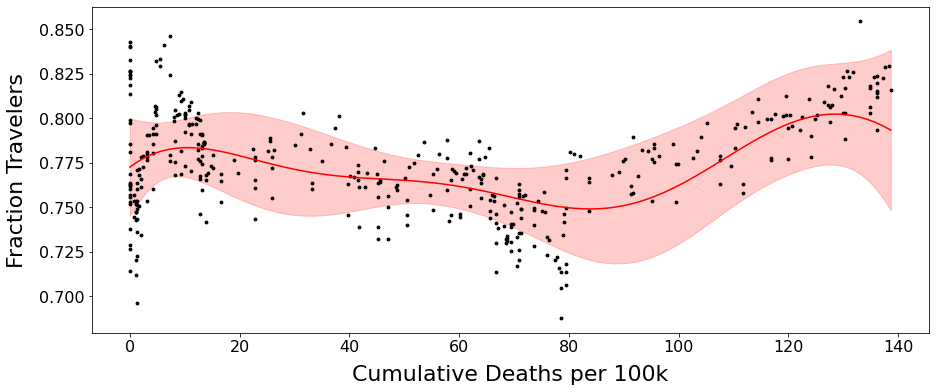

Cross-validated MSE: 0.05934390443931824
Kernel Used: 0.49**2 * RBF(length_scale=0.2)


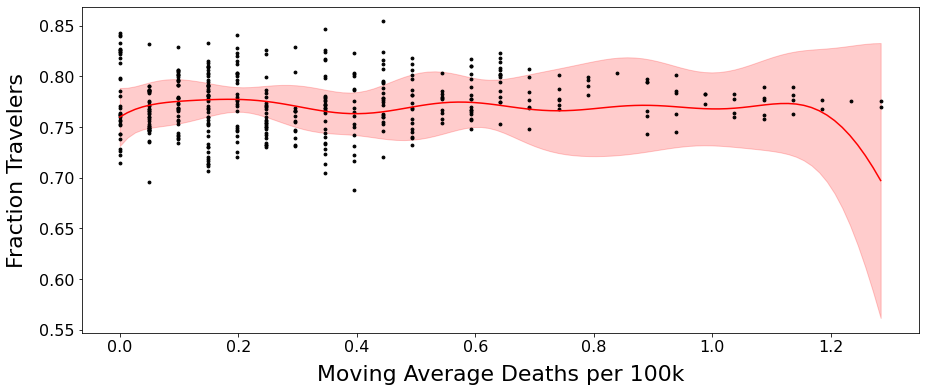

In [4]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Population")
chatham_length_scales = [40,2000,40,0.5,40,0.2]
save_list = [False, True, False, False, False, False]
for i in range(len(chatham_X.columns)):
    GPR_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_length_scales[i], "Fraction Travelers",
               save=save_list[i],save_county="Chatham County")

# Long Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 9.89482996018696e-05
Kernel Used: 0.1**2 * RBF(length_scale=40)


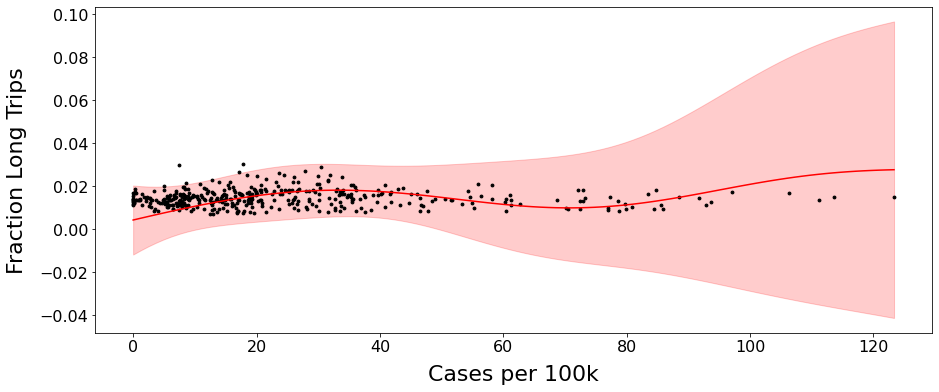

Cross-validated MSE: 0.0002734868027372715
Kernel Used: 0.1**2 * RBF(length_scale=2e+03)


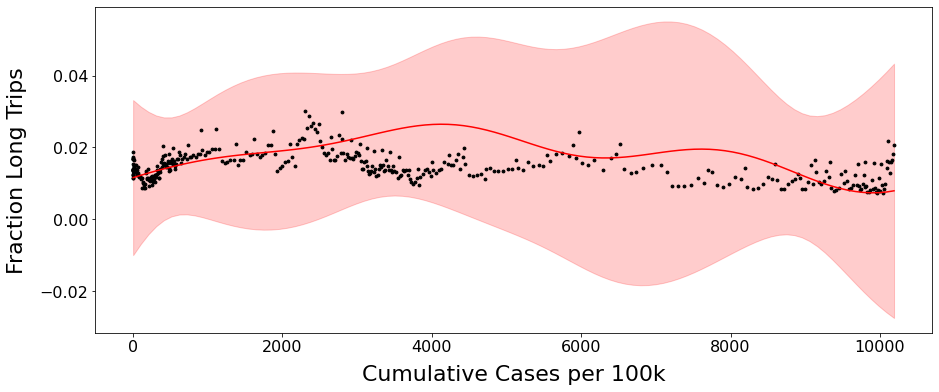

Cross-validated MSE: 8.978213988433124e-05
Kernel Used: 0.1**2 * RBF(length_scale=40)


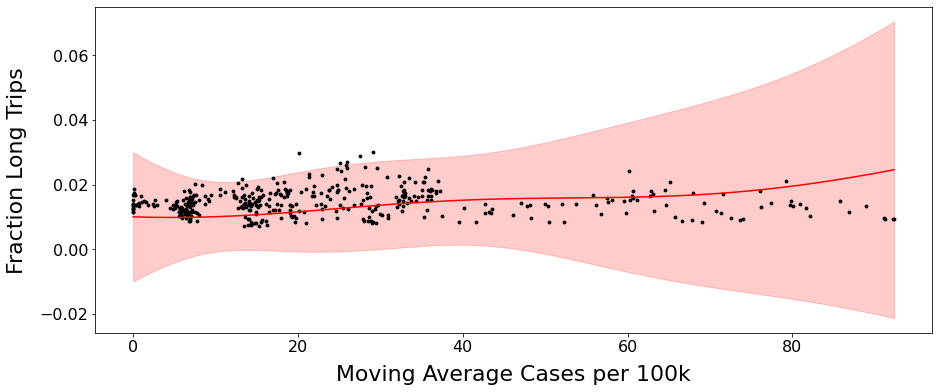

Cross-validated MSE: 0.00012681373849966472
Kernel Used: 0.1**2 * RBF(length_scale=0.5)


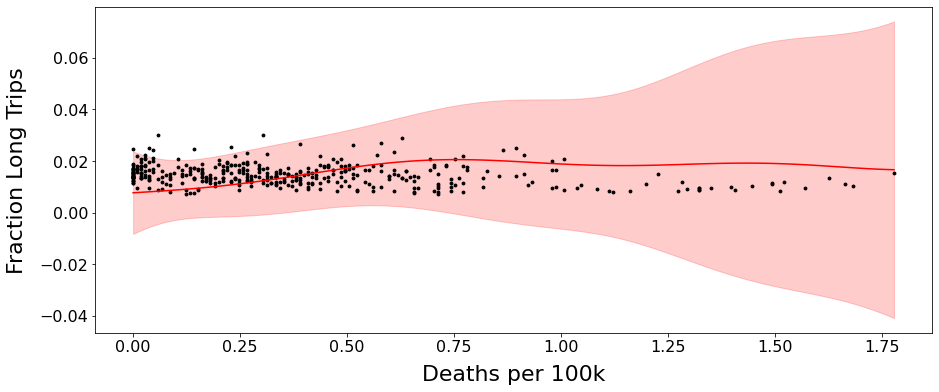

Cross-validated MSE: 0.0001829525949257005
Kernel Used: 0.1**2 * RBF(length_scale=40)


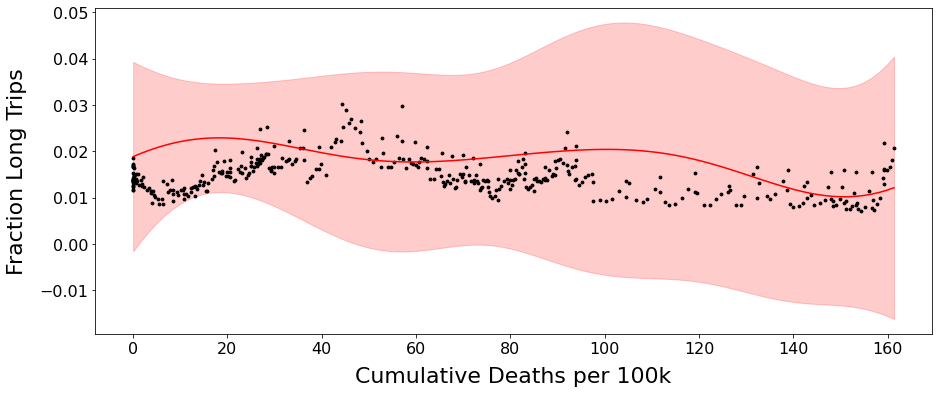

Cross-validated MSE: 0.0002654667997170245
Kernel Used: 0.1**2 * RBF(length_scale=0.2)


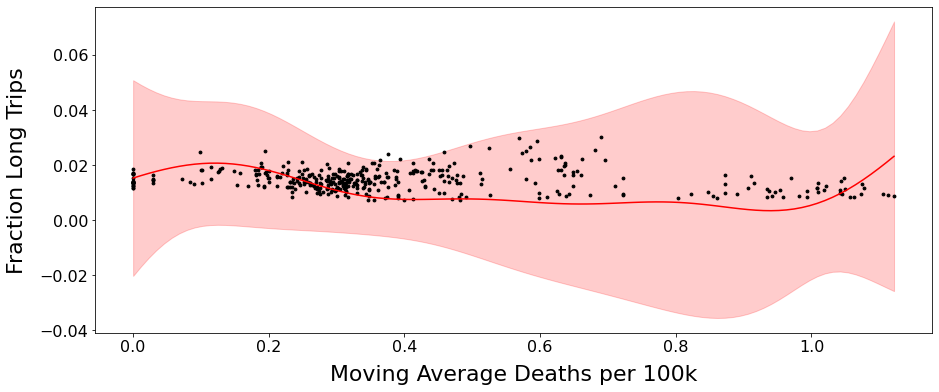

In [25]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Long")
state_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(state_X.columns)):
    GPR_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_length_scales[i], "Fraction Long Trips")

0.1**2 * RBF(length_scale=40)


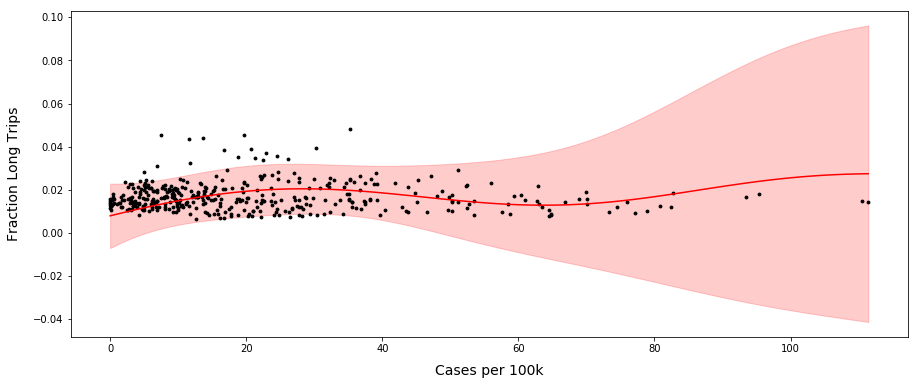

0.1**2 * RBF(length_scale=2e+03)


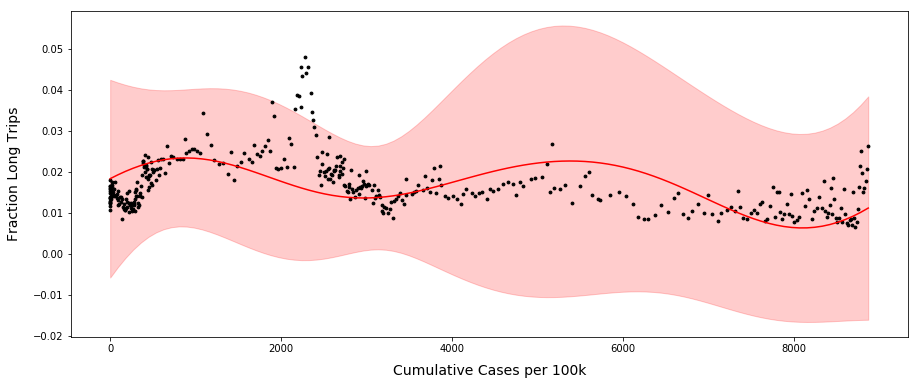

0.1**2 * RBF(length_scale=40)


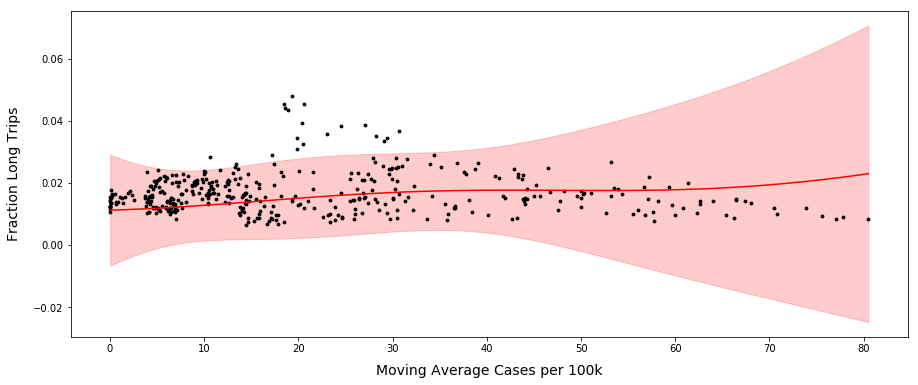

0.1**2 * RBF(length_scale=0.5)


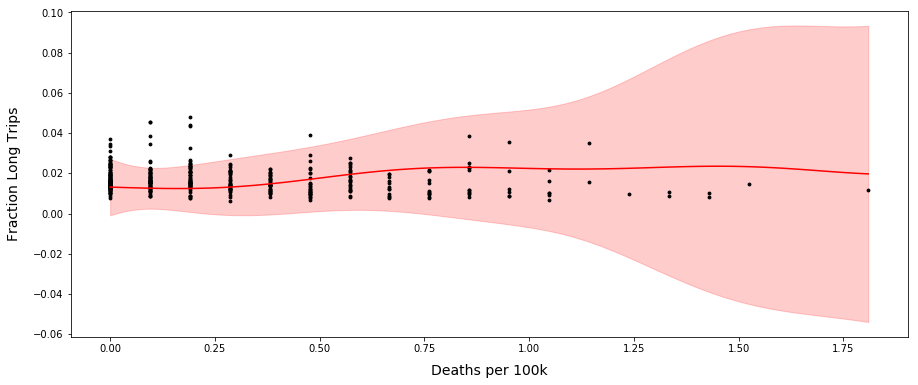

0.1**2 * RBF(length_scale=40)


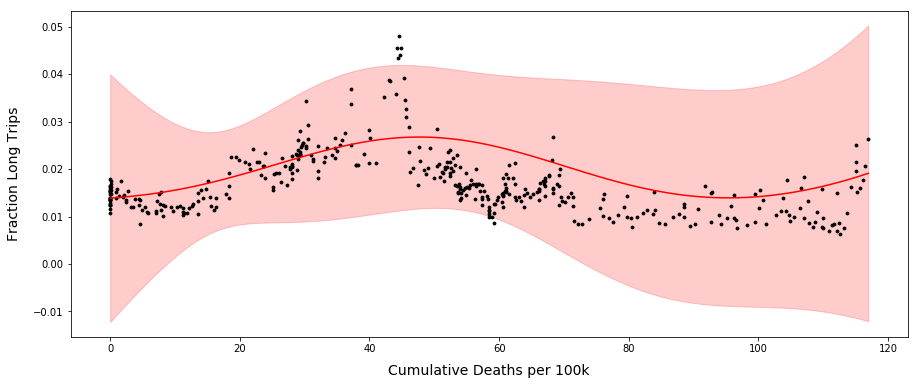

0.1**2 * RBF(length_scale=0.2)


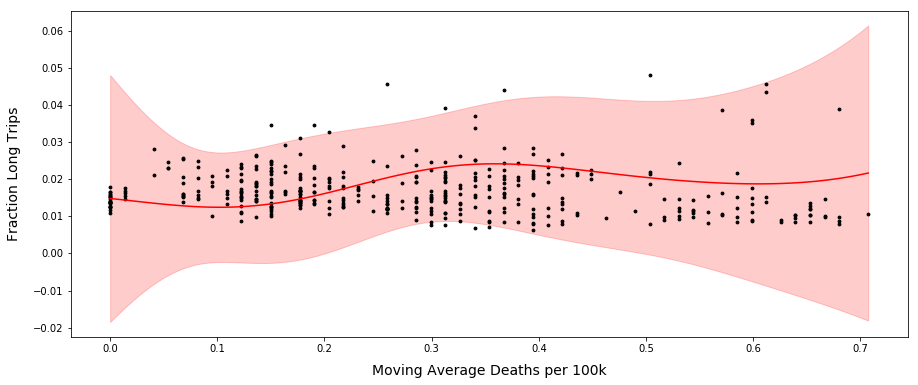

In [23]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Long")
fulton_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(fulton_X.columns)):
    GPR_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_length_scales[i], "Fraction Long Trips")

0.1**2 * RBF(length_scale=40)


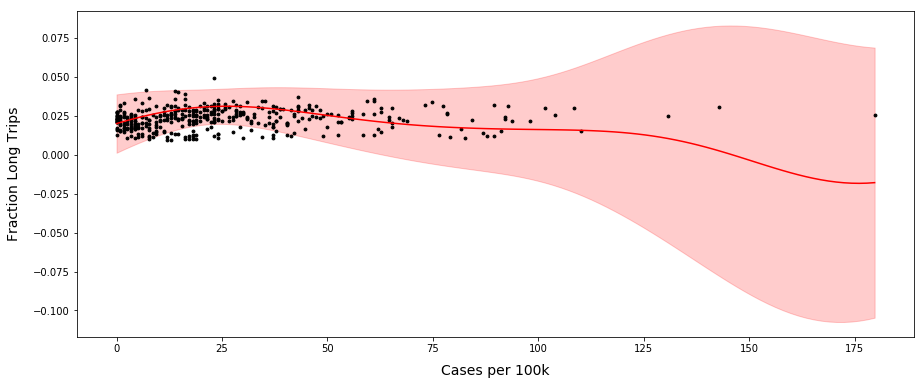

0.1**2 * RBF(length_scale=2e+03)


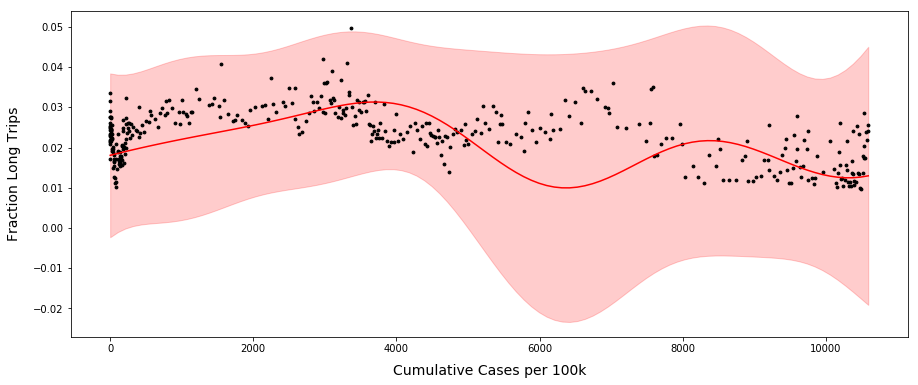

0.1**2 * RBF(length_scale=40)


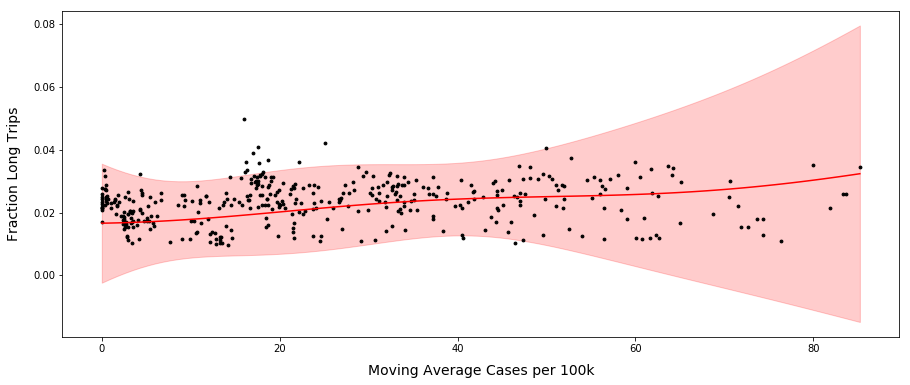

0.1**2 * RBF(length_scale=0.5)


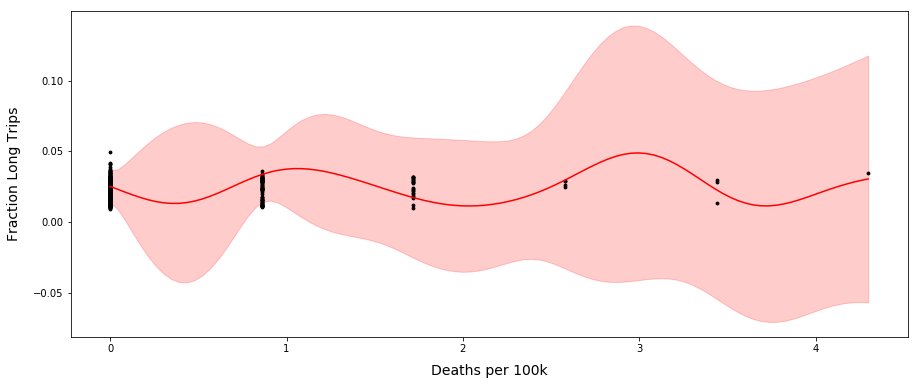

0.1**2 * RBF(length_scale=40)


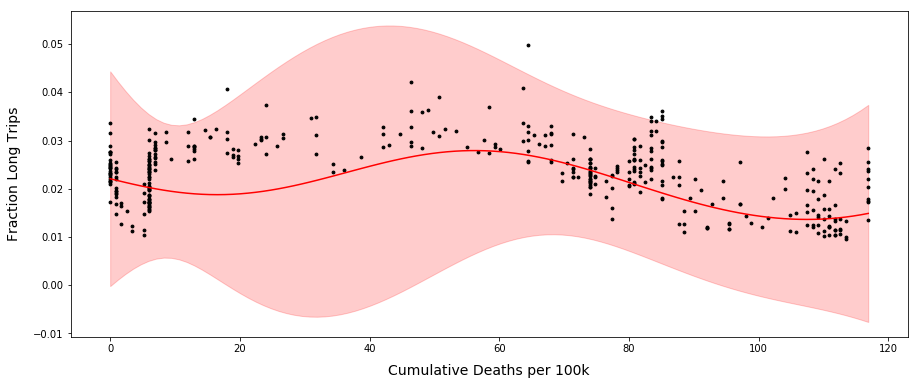

0.1**2 * RBF(length_scale=0.2)


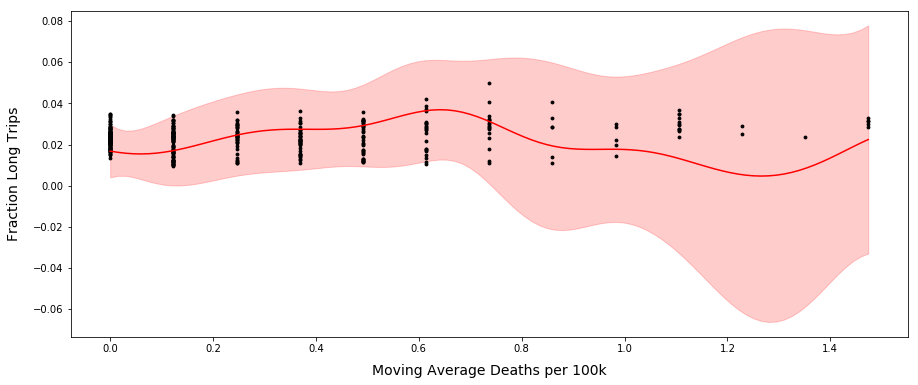

In [24]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Long")
lowndes_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(lowndes_X.columns)):
    GPR_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_length_scales[i], "Fraction Long Trips")

0.1**2 * RBF(length_scale=40)


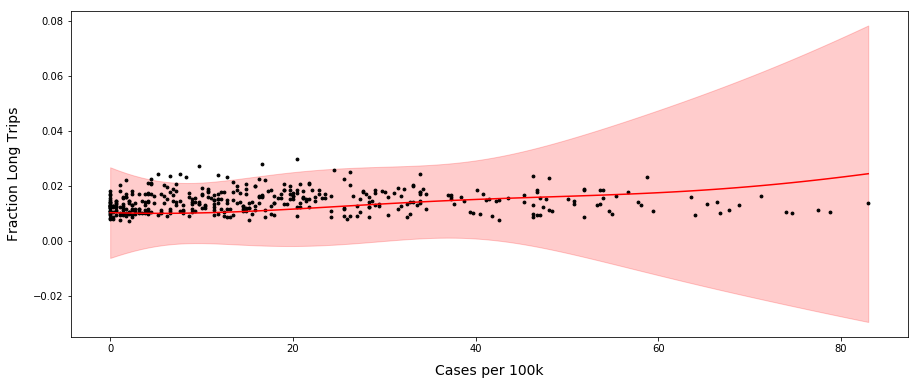

0.1**2 * RBF(length_scale=2e+03)


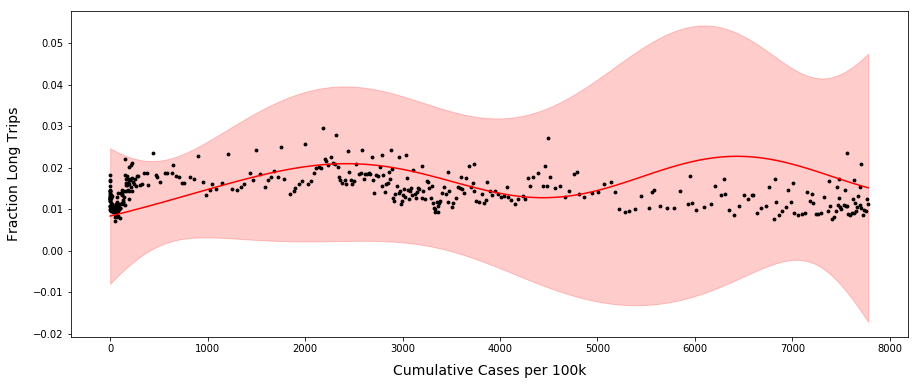

0.1**2 * RBF(length_scale=40)


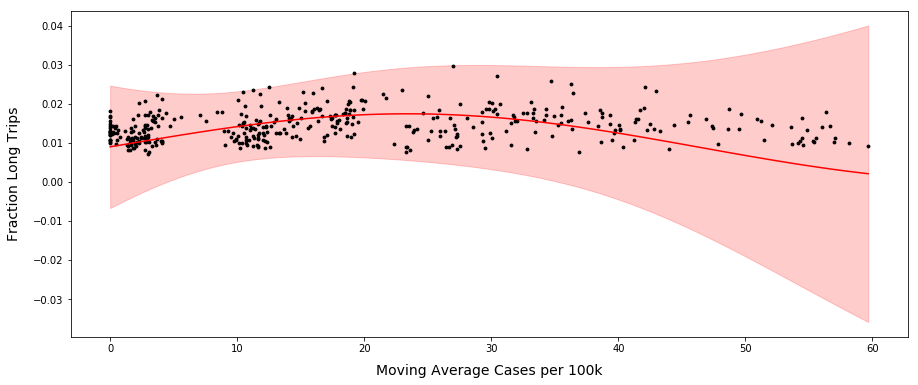

0.1**2 * RBF(length_scale=0.5)


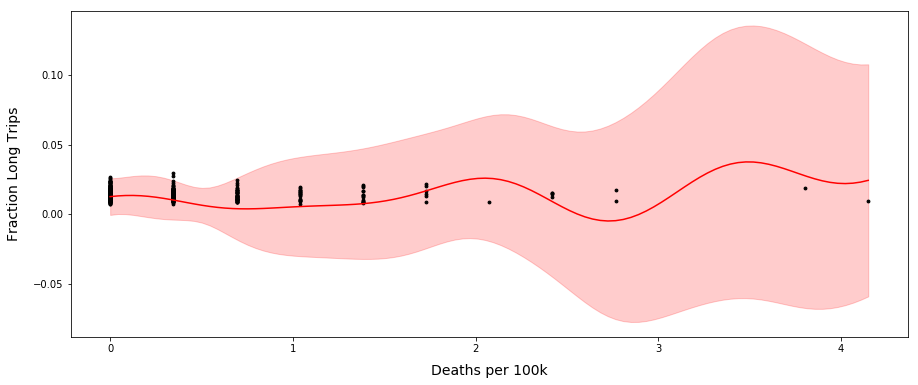

0.1**2 * RBF(length_scale=40)


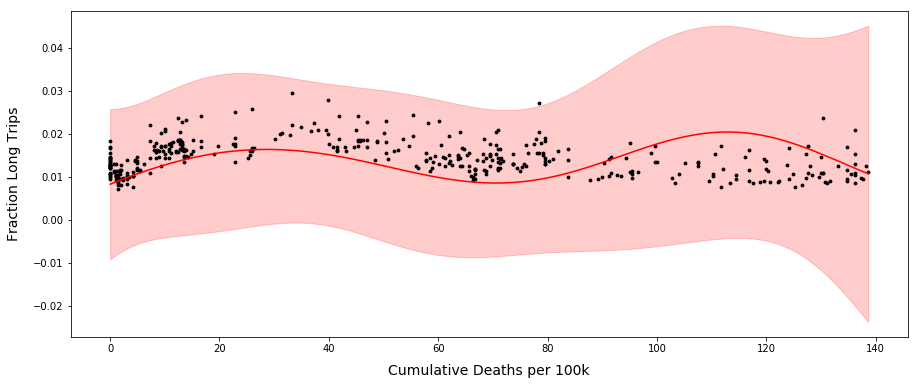

0.1**2 * RBF(length_scale=0.2)


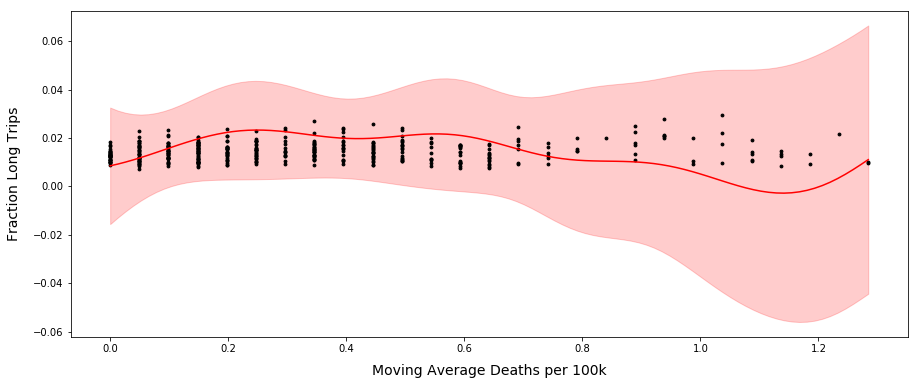

In [25]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Long")
chatham_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(chatham_X.columns)):
    GPR_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_length_scales[i], "Fraction Long Trips")

# Medium Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.002929543507125522
Kernel Used: 0.157**2 * RBF(length_scale=40)


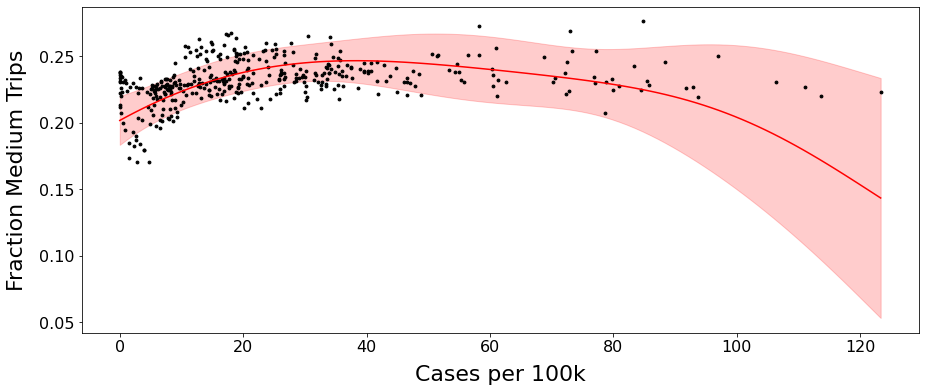

Cross-validated MSE: 0.005991092205832685
Kernel Used: 0.159**2 * RBF(length_scale=2e+03)


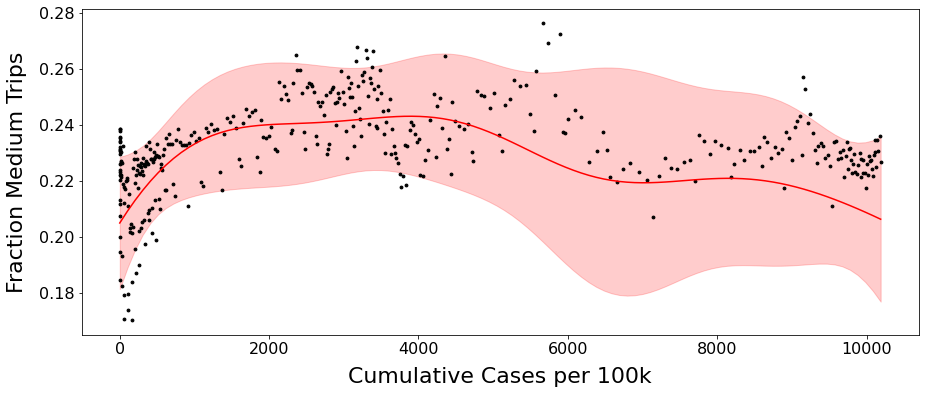

Cross-validated MSE: 0.0024659033997958203
Kernel Used: 0.157**2 * RBF(length_scale=40)


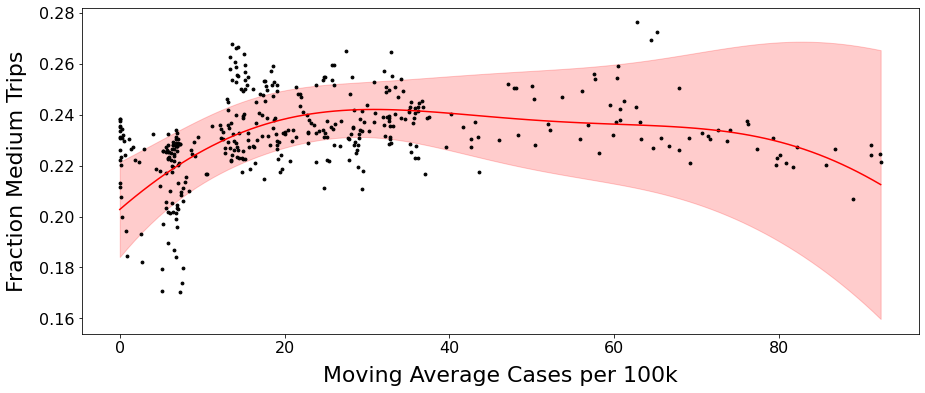

Cross-validated MSE: 0.0034384924580745705
Kernel Used: 0.158**2 * RBF(length_scale=0.5)


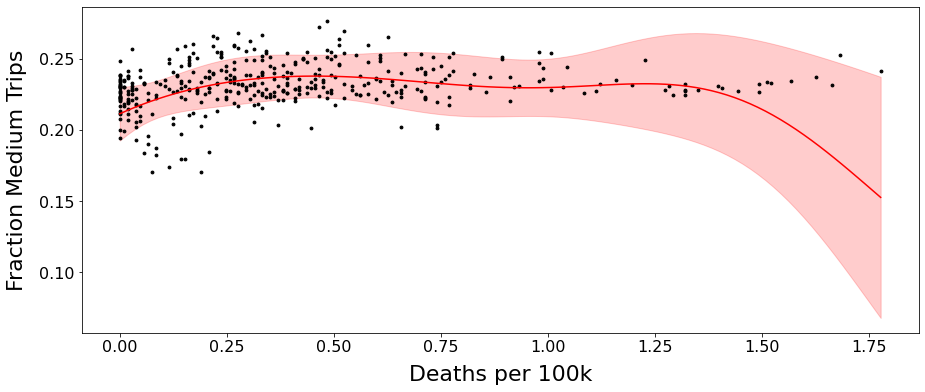

Cross-validated MSE: 0.0055320520477922155
Kernel Used: 0.157**2 * RBF(length_scale=40)


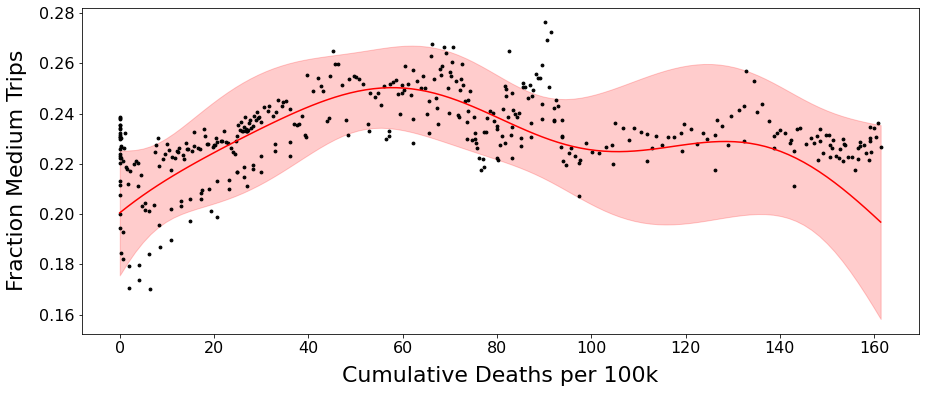

Cross-validated MSE: 0.009556604417364011
Kernel Used: 0.159**2 * RBF(length_scale=0.2)


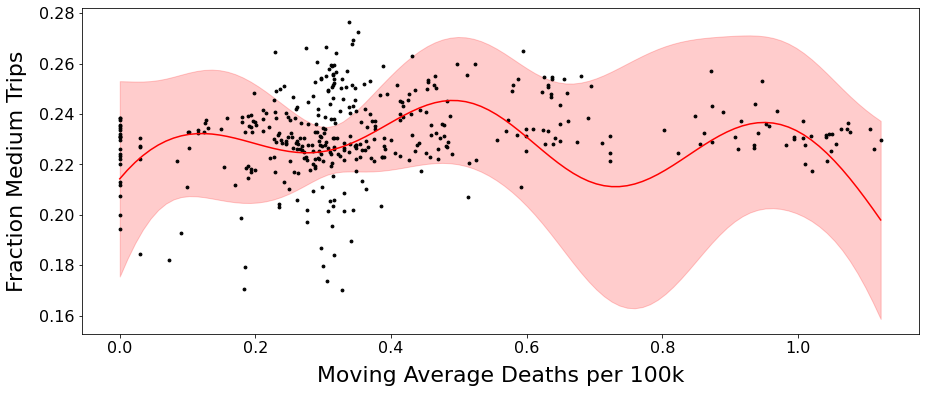

In [26]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Medium")
state_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(state_X.columns)):
    GPR_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_length_scales[i], "Fraction Medium Trips")

0.136**2 * RBF(length_scale=40)


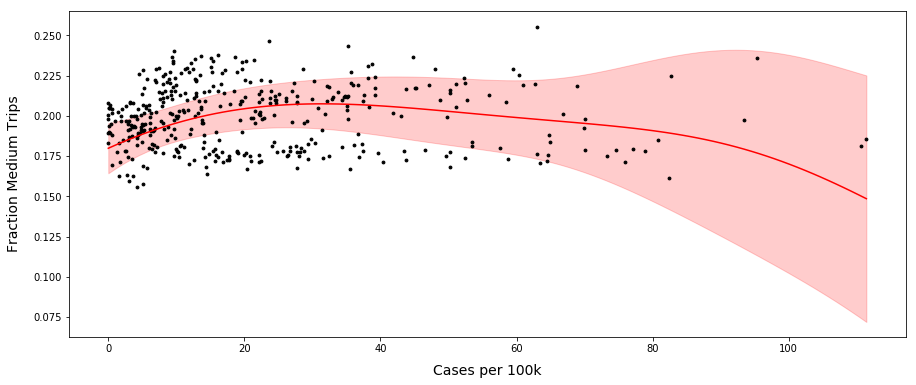

0.136**2 * RBF(length_scale=2e+03)


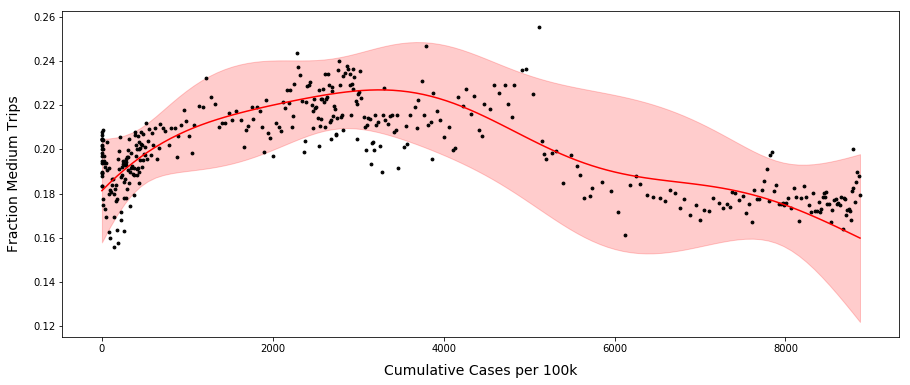

0.135**2 * RBF(length_scale=40)


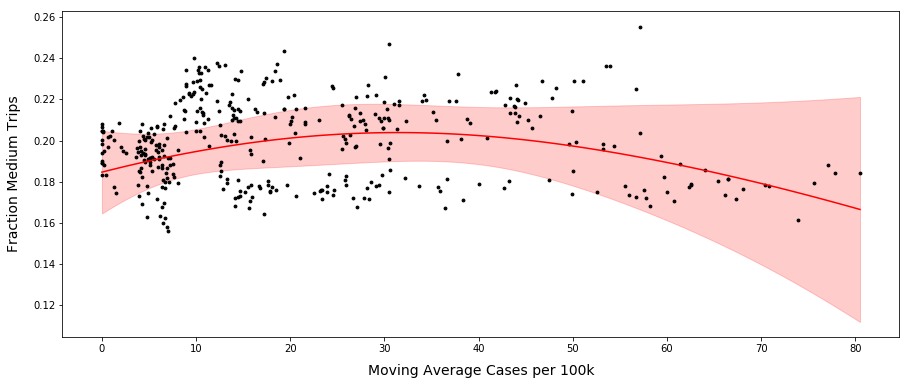

0.135**2 * RBF(length_scale=0.5)


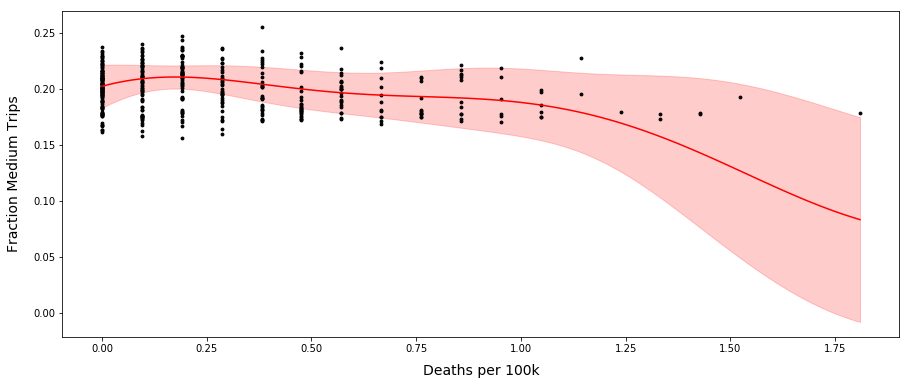

0.133**2 * RBF(length_scale=40)


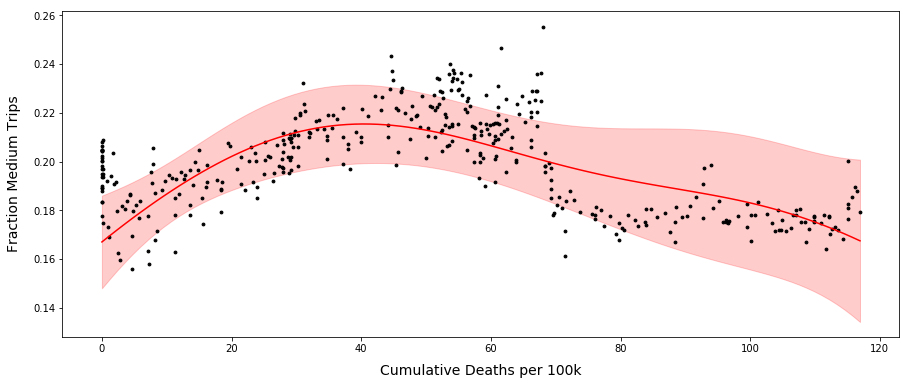

0.134**2 * RBF(length_scale=0.2)


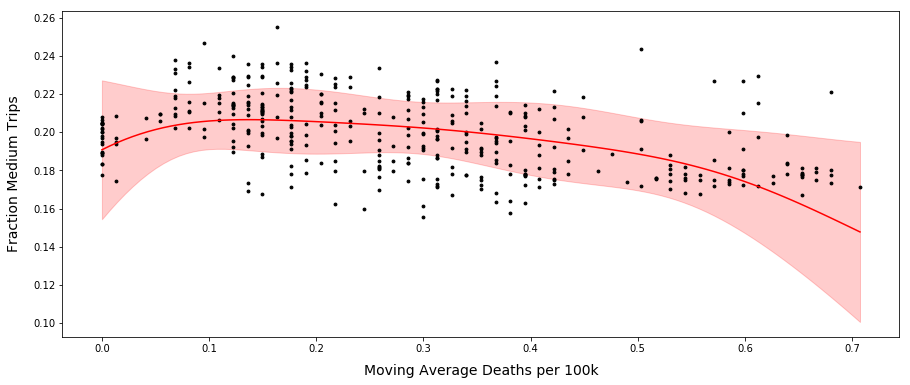

In [27]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Medium")
fulton_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(fulton_X.columns)):
    GPR_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_length_scales[i], "Fraction Medium Trips")

0.133**2 * RBF(length_scale=40)


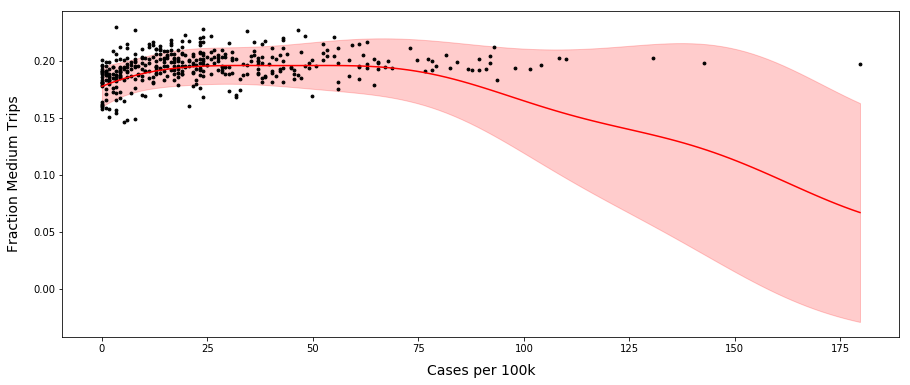

0.136**2 * RBF(length_scale=2e+03)


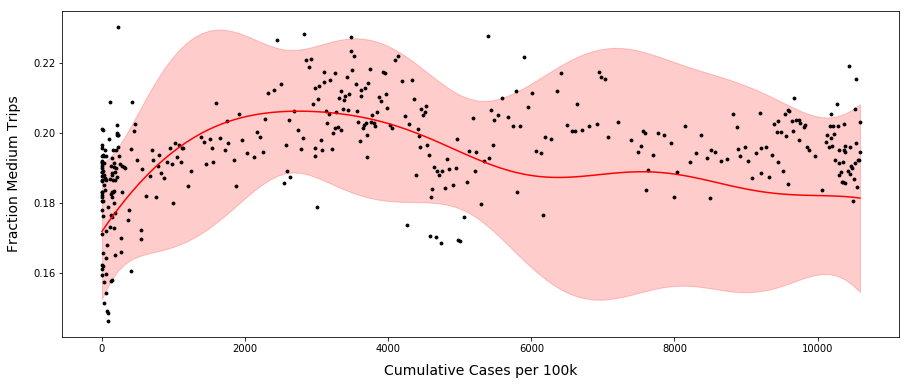

0.134**2 * RBF(length_scale=40)


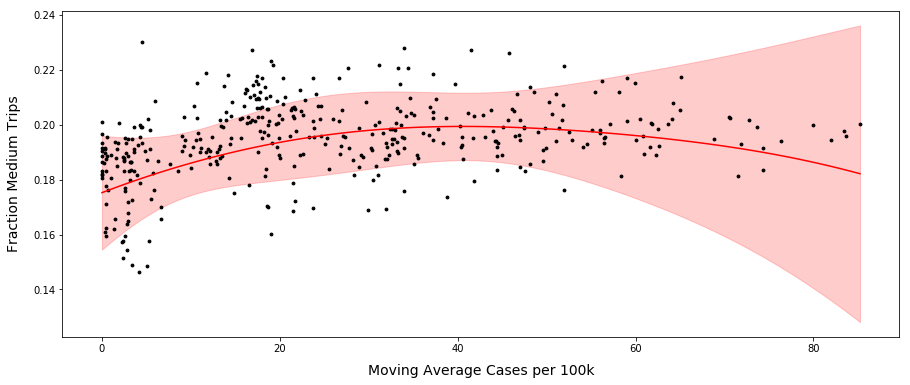

0.161**2 * RBF(length_scale=0.5)


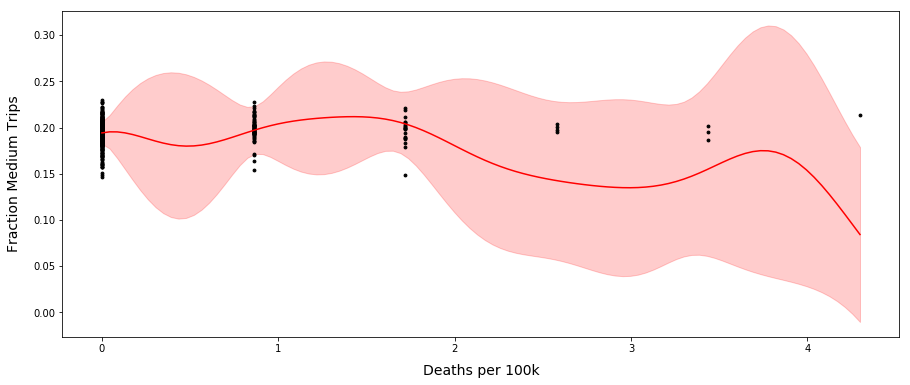

0.136**2 * RBF(length_scale=40)


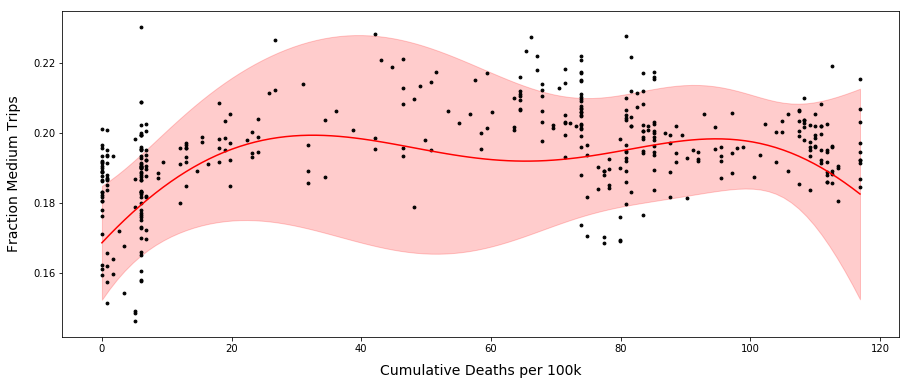

0.14**2 * RBF(length_scale=0.2)


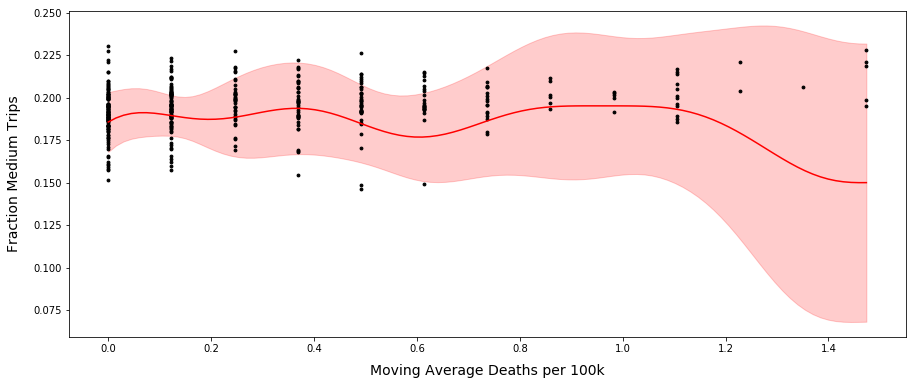

In [28]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Medium")
lowndes_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(lowndes_X.columns)):
    GPR_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_length_scales[i], "Fraction Medium Trips")

0.117**2 * RBF(length_scale=40)


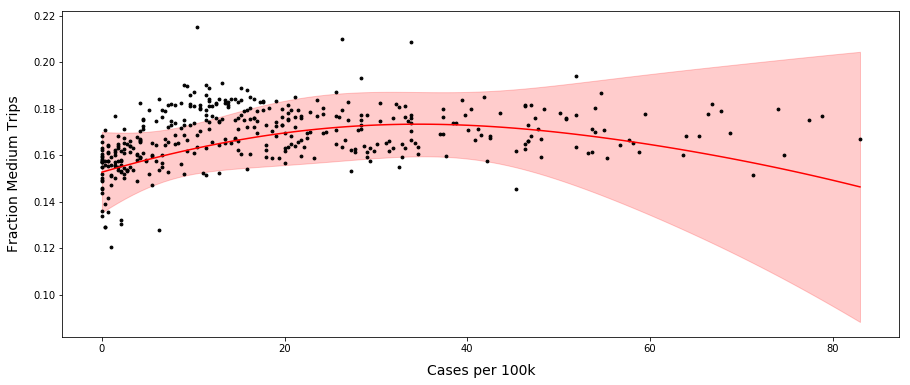

0.12**2 * RBF(length_scale=2e+03)


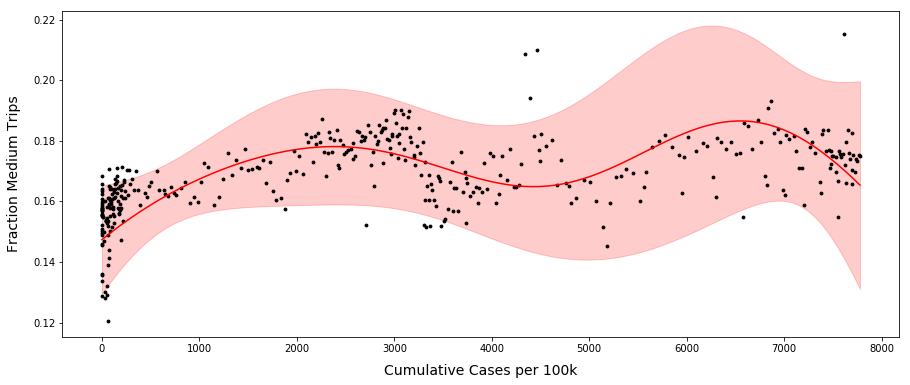

0.116**2 * RBF(length_scale=40)


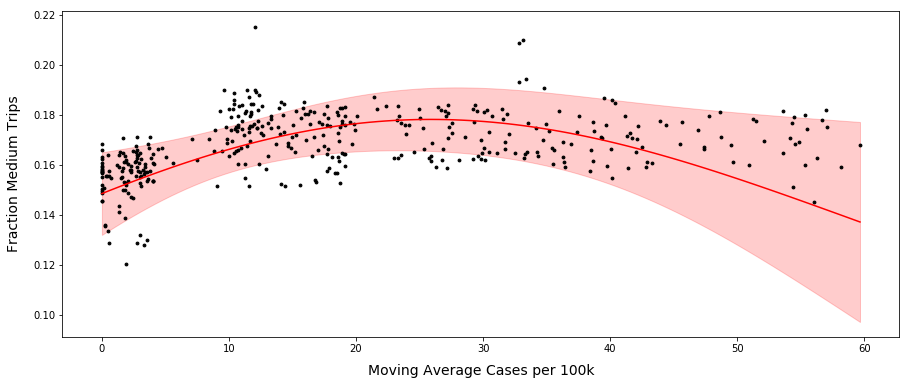

0.121**2 * RBF(length_scale=0.5)


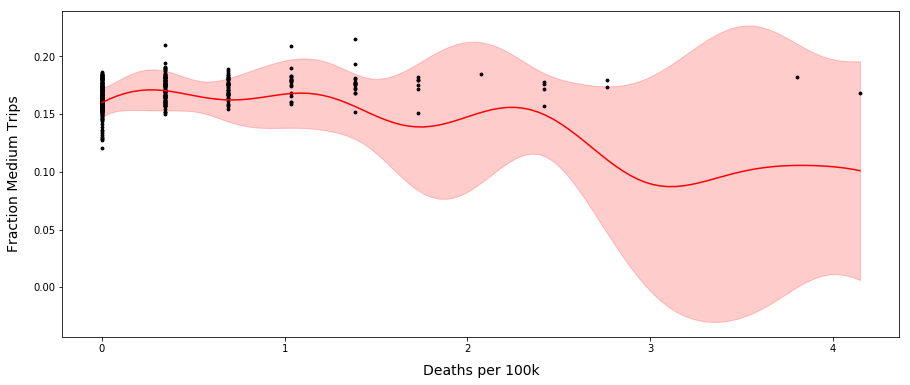

0.119**2 * RBF(length_scale=40)


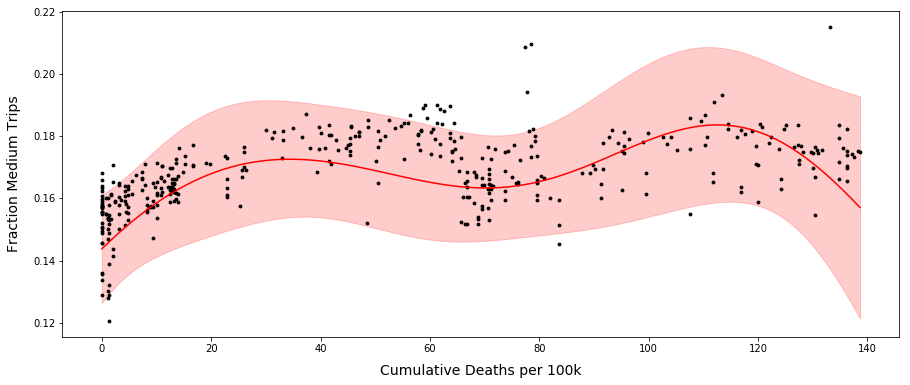

0.118**2 * RBF(length_scale=0.2)


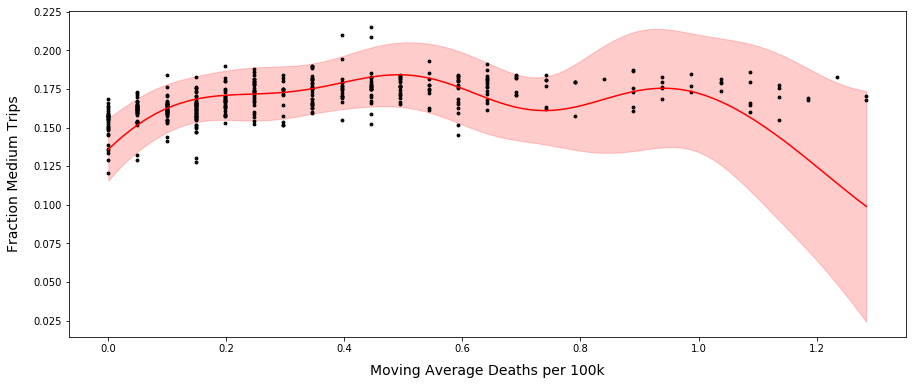

In [29]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Medium")
chatham_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(chatham_X.columns)):
    GPR_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_length_scales[i], "Fraction Medium Trips")

# Short Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.01359282611836552
Kernel Used: 0.501**2 * RBF(length_scale=40)


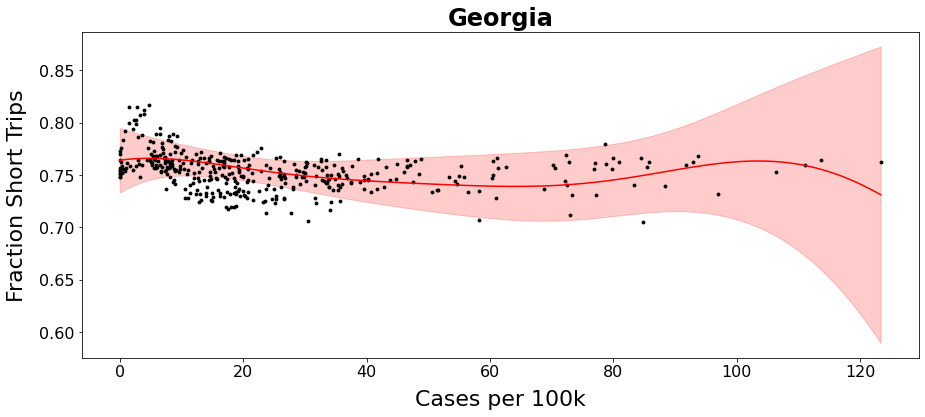

Cross-validated MSE: 0.02902725287875944
Kernel Used: 0.481**2 * RBF(length_scale=2e+03)


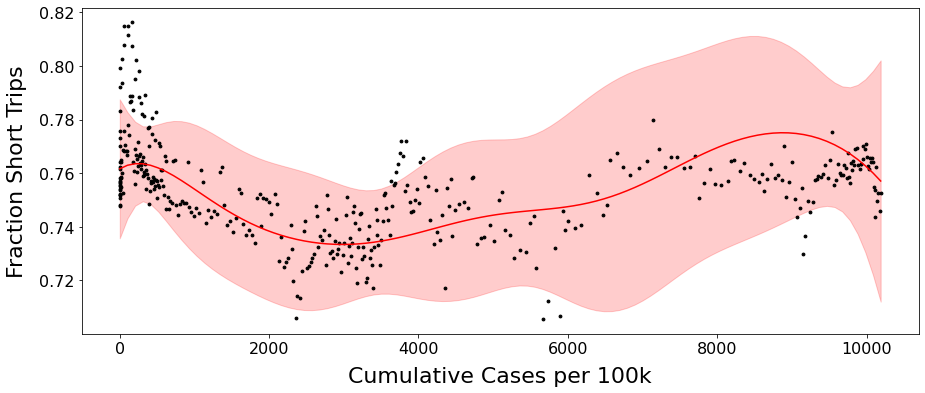

Cross-validated MSE: 0.010421468137791833
Kernel Used: 0.5**2 * RBF(length_scale=40)


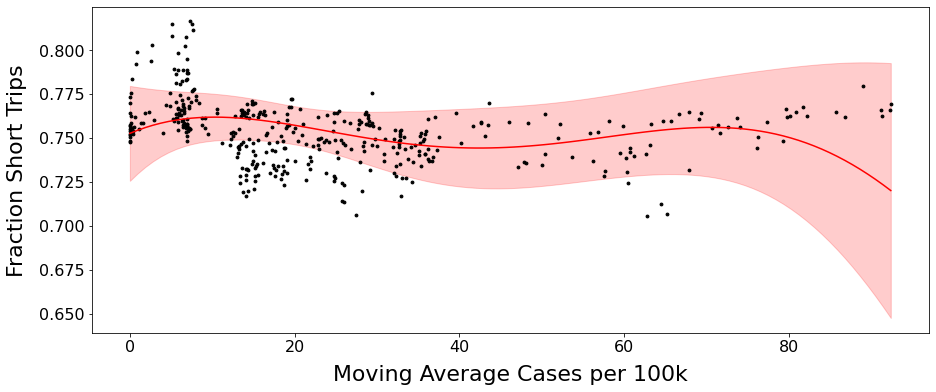

Cross-validated MSE: 0.023693640589843204
Kernel Used: 0.486**2 * RBF(length_scale=0.5)


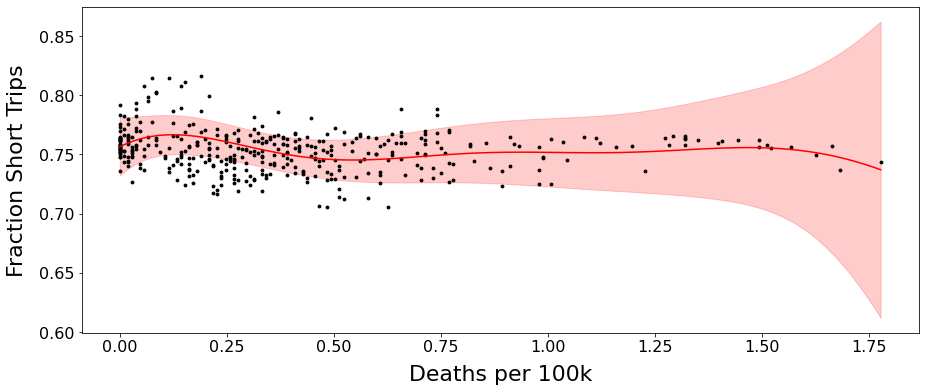

Cross-validated MSE: 0.029949054512033963
Kernel Used: 0.479**2 * RBF(length_scale=40)


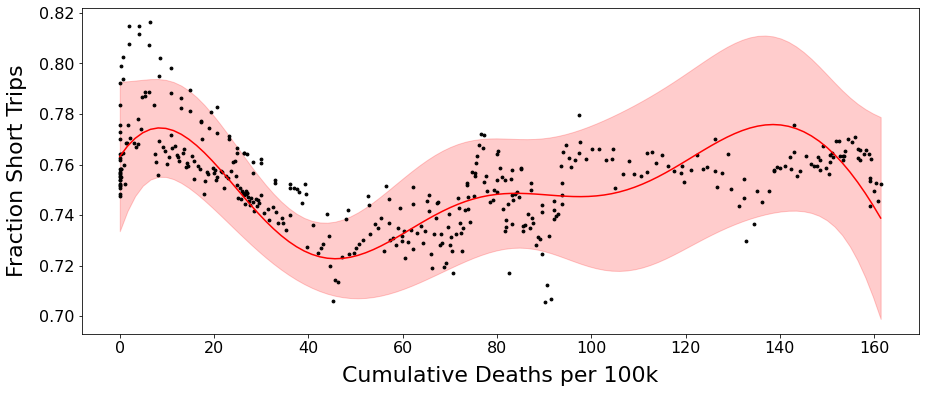

Cross-validated MSE: 0.07684474950692403
Kernel Used: 0.479**2 * RBF(length_scale=0.2)


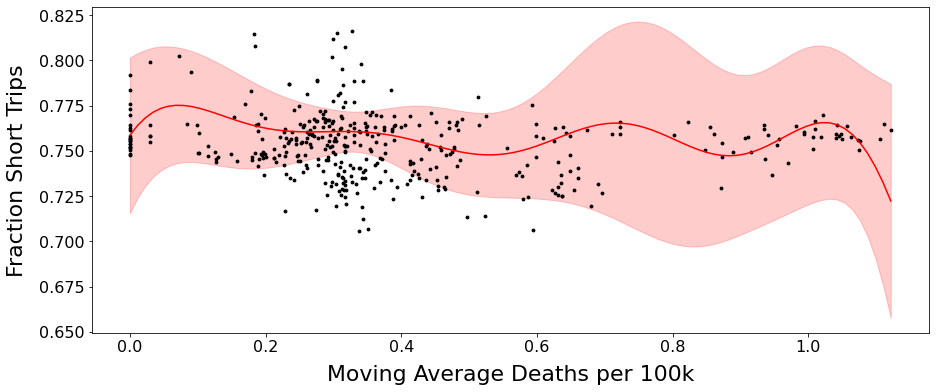

In [27]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Short")
state_length_scales = [40,2000,40,0.5,40,0.2]
save_list = [True, False, False, False, False, False]
for i in range(len(state_X.columns)):
    GPR_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_length_scales[i], "Fraction Short Trips",
               save=save_list[i],save_county = "Georgia")

0.516**2 * RBF(length_scale=40)


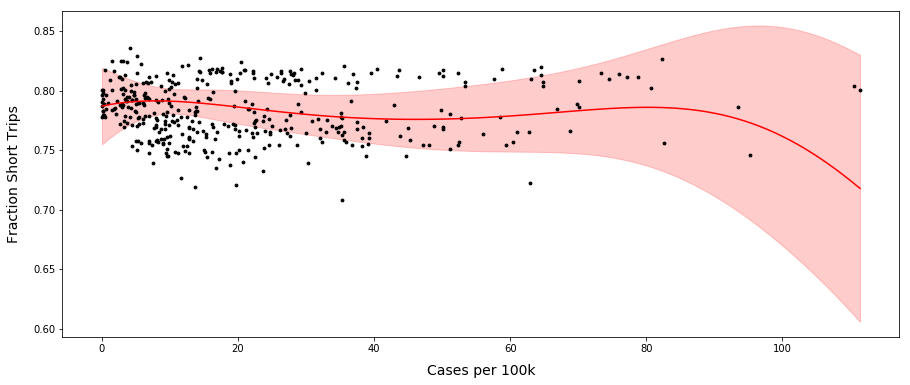

0.506**2 * RBF(length_scale=2e+03)


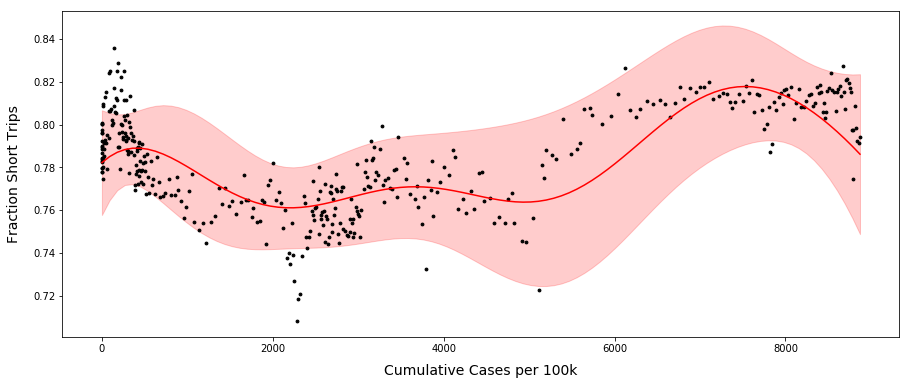

0.524**2 * RBF(length_scale=40)


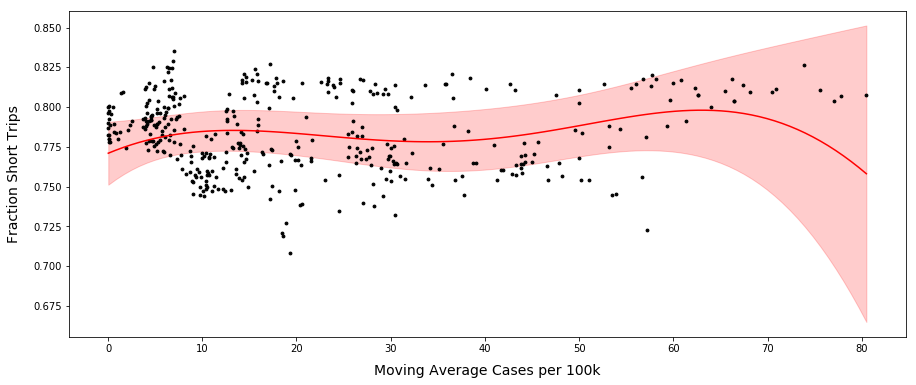

0.517**2 * RBF(length_scale=0.5)


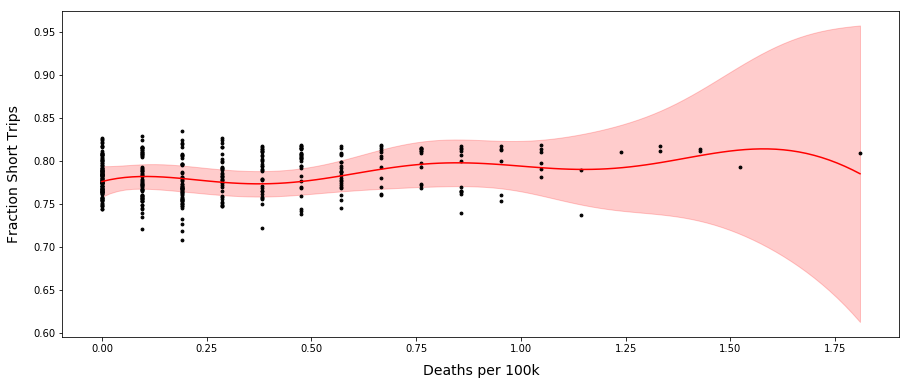

0.505**2 * RBF(length_scale=40)


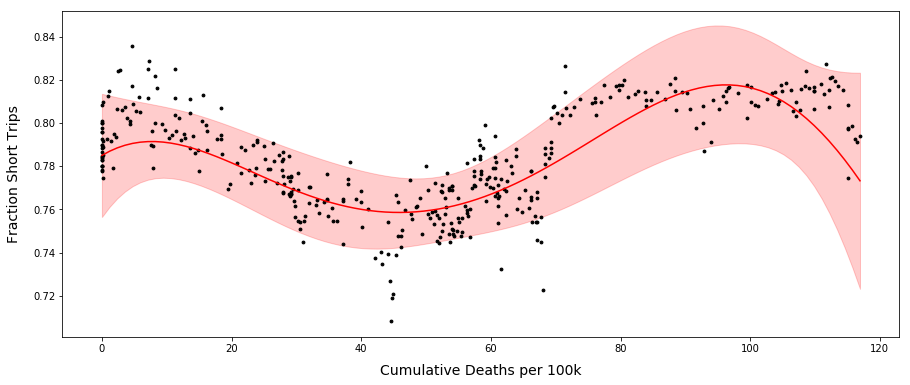

0.507**2 * RBF(length_scale=0.2)


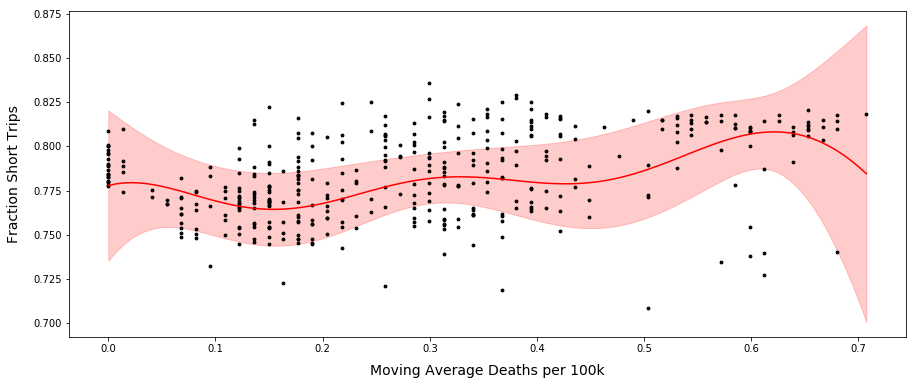

In [31]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Short")
fulton_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(fulton_X.columns)):
    GPR_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_length_scales[i], "Fraction Short Trips")

0.517**2 * RBF(length_scale=40)


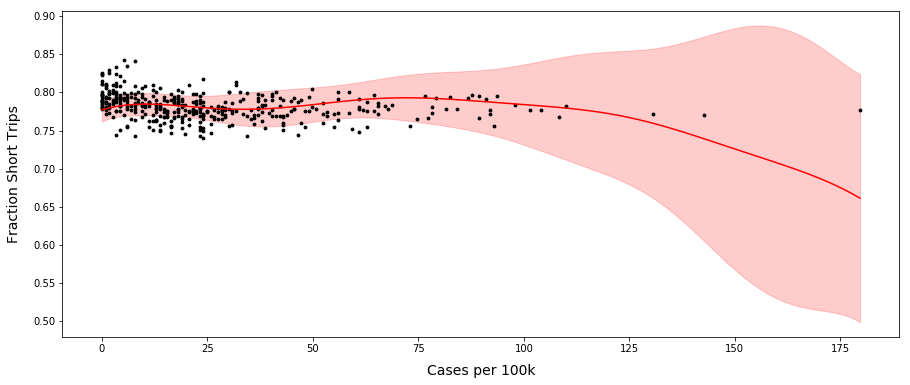

0.495**2 * RBF(length_scale=2e+03)


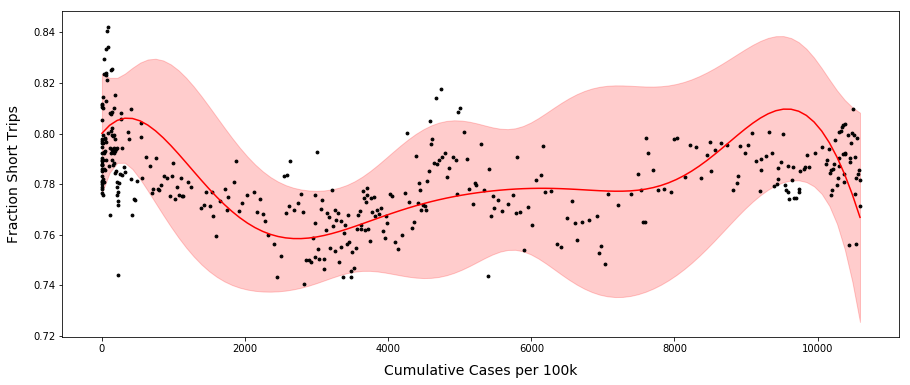

0.513**2 * RBF(length_scale=40)


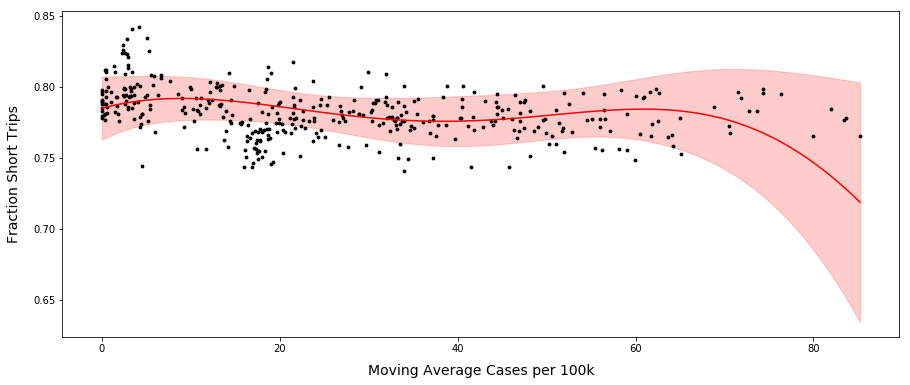

0.657**2 * RBF(length_scale=0.5)


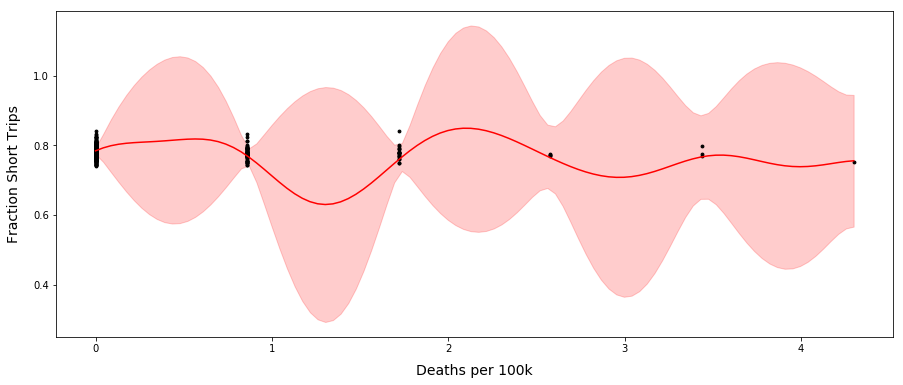

0.507**2 * RBF(length_scale=40)


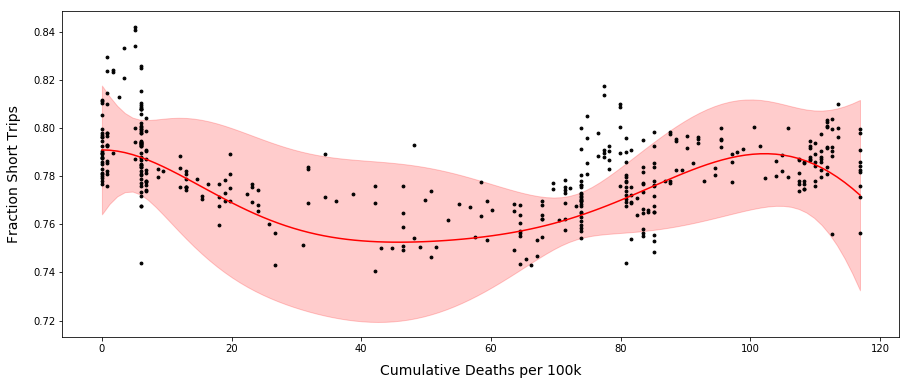

0.501**2 * RBF(length_scale=0.2)


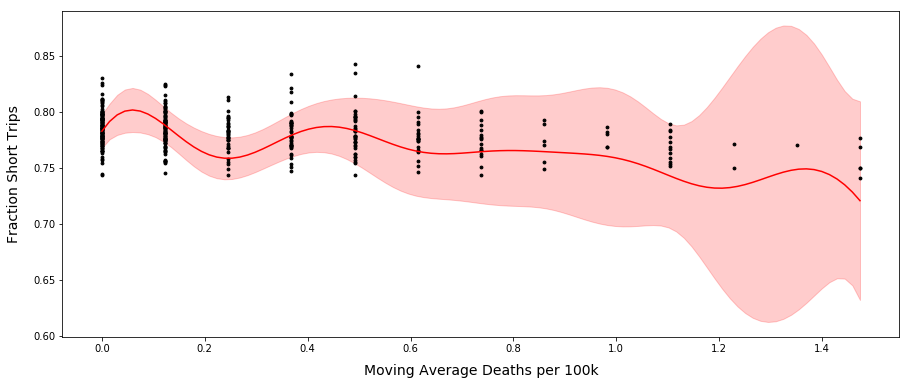

In [32]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Short")
lowndes_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(lowndes_X.columns)):
    GPR_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_length_scales[i], "Fraction Short Trips")

0.543**2 * RBF(length_scale=40)


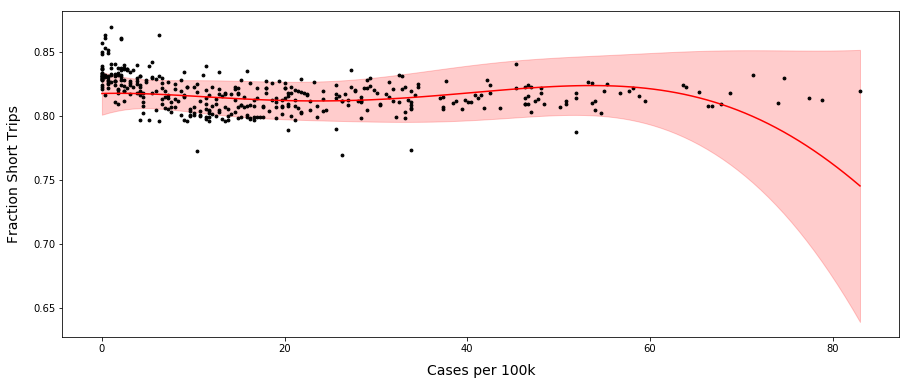

0.522**2 * RBF(length_scale=2e+03)


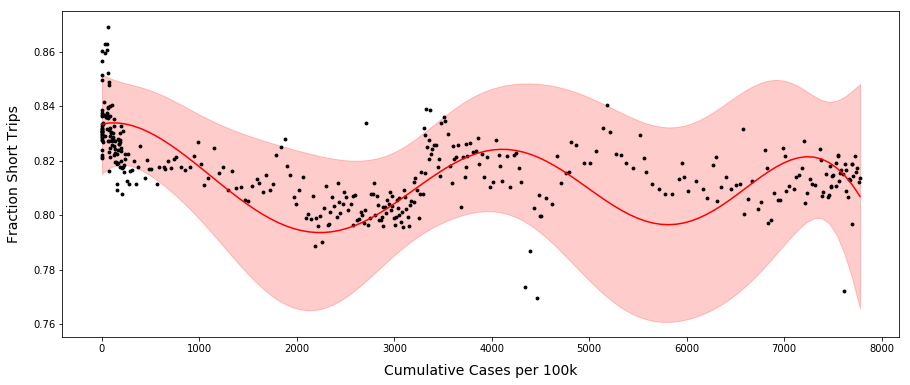

0.561**2 * RBF(length_scale=40)


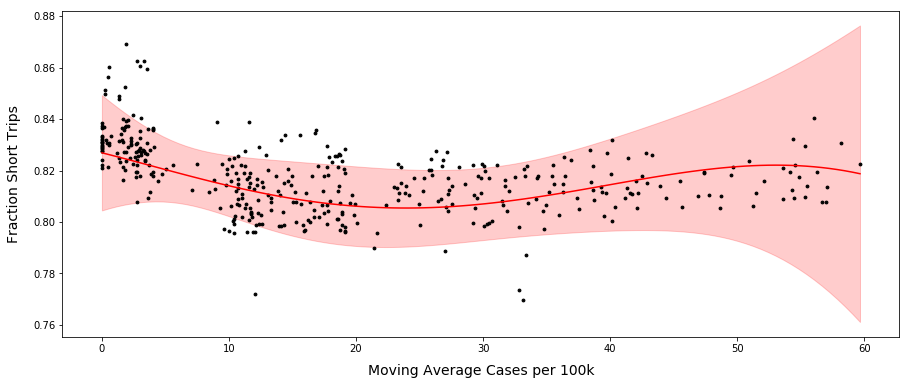

0.552**2 * RBF(length_scale=0.5)


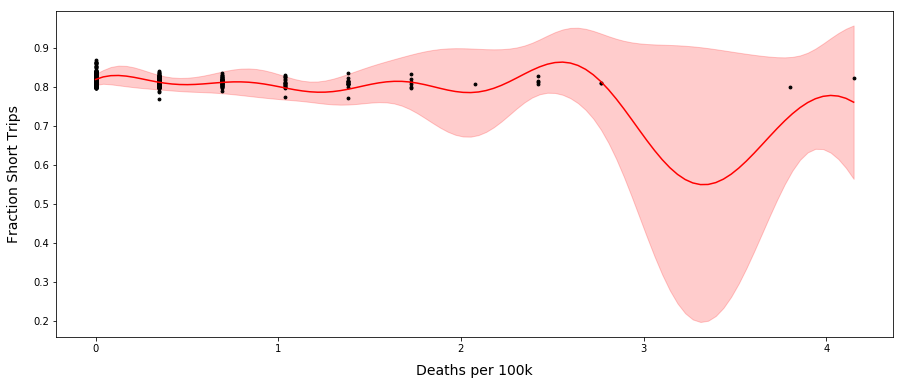

0.525**2 * RBF(length_scale=40)


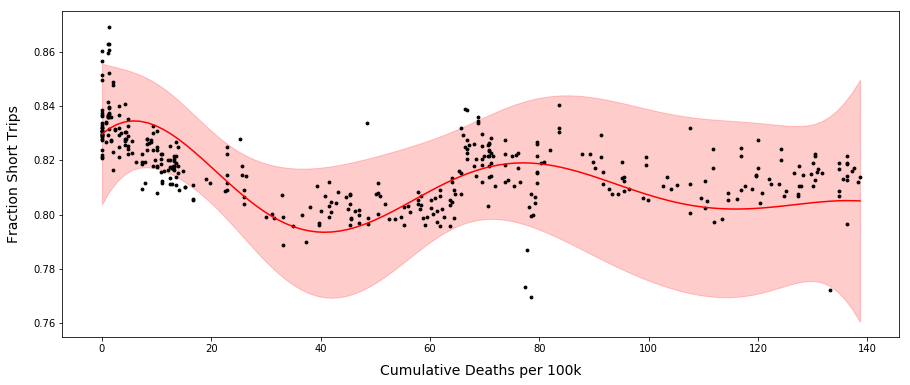

0.513**2 * RBF(length_scale=0.2)


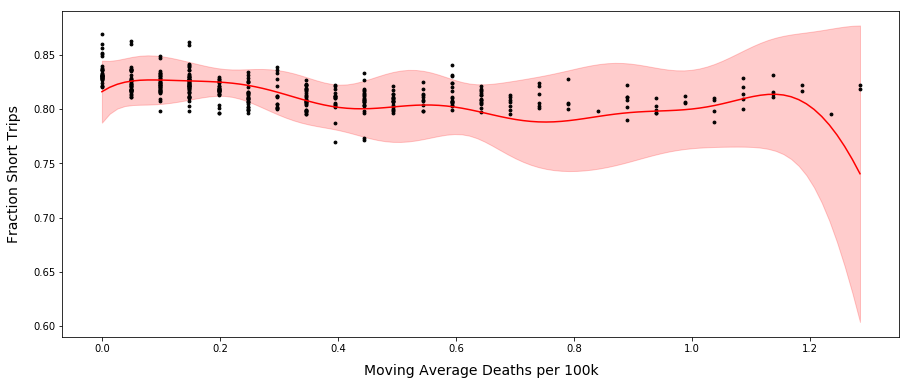

In [33]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Short")
chatham_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(chatham_X.columns)):
    GPR_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_length_scales[i], "Fraction Short Trips")

# BIVARIATE

In [7]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")

combined_data = np.array(pd.concat([fulton_X["total_cases_cum"],fulton_X["moving_avg_deaths"]],axis=1))

l = (2000, 0.2)
sigma_f = 0.2
sigma_n = .2

kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
    * RBF(length_scale=l, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)

kf = KFold(n_splits=5)
mse_vals = []
for train_indices, test_indices in kf.split(combined_data):
    train_X, test_X = combined_data[train_indices], combined_data[test_indices]
    train_y, test_y = fulton_y[train_indices], fulton_y[test_indices]

    gpr.fit(train_X, train_y)
    
    y_hat_samples = gpr.sample_y(test_X, n_samples=20)
    y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
    pred_y = np.array(y_hat)
    
    mse = ((test_y - pred_y)**2).mean()
    mse_vals.append(mse)

print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))
gpr.fit(combined_data, fulton_y)

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.03738207009416549


GaussianProcessRegressor(alpha=0.04000000000000001,
                         kernel=0.447**2 * RBF(length_scale=[2e+03, 0.2]),
                         n_restarts_optimizer=10)

In [8]:
print(gpr.kernel_)

x1_range = np.linspace(0.9*min(combined_data[:,0]),1.2*max(combined_data[:,0]),100)
x2_range = np.linspace(0.9*min(combined_data[:,1]),1.2*max(combined_data[:,1]),100)

mesh_x = np.array(np.meshgrid(x1_range,x2_range)).T.reshape(-1,2)

y_hat_samples = gpr.sample_y(mesh_x, n_samples=20)
y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()

y_hat_sd_arr = np.array(y_hat_sd)
y_hat_arr = np.array(y_hat)

y_hat_mesh = np.reshape(y_hat_arr,(100,100))
y_sd_mesh = np.reshape(y_hat_sd_arr, (100,100))

x1_mesh = mesh_x[:,0].reshape(100,100)
x2_mesh = mesh_x[:,1].reshape(100,100)

0.38**2 * RBF(length_scale=[2e+03, 0.2])


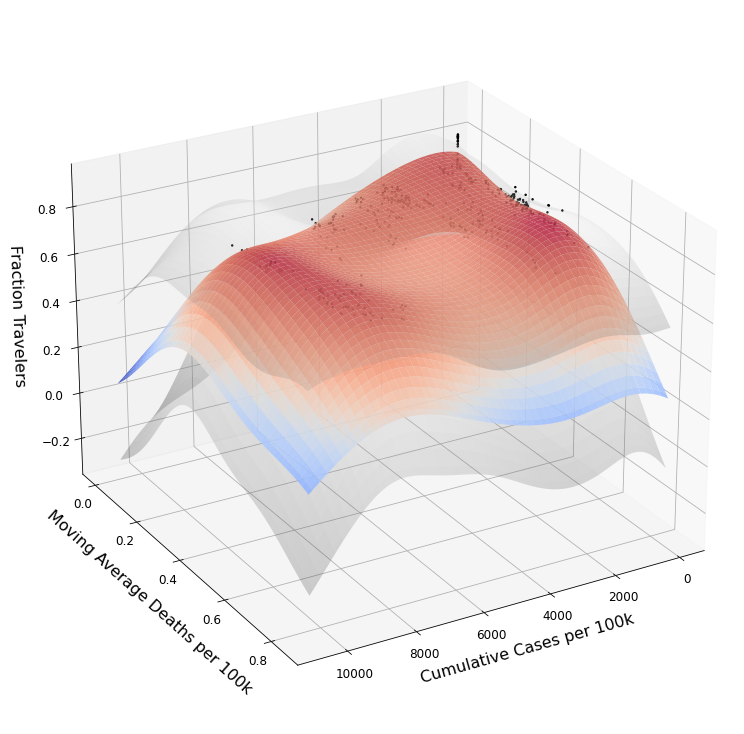

In [9]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(fulton_X["total_cases_cum"],fulton_X["moving_avg_deaths"],fulton_y,s=2,color='k',alpha=1)
ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh, cmap=cm.coolwarm, linewidth=0, antialiased=True,alpha=.9)
ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh-y_sd_mesh, cmap=cm.gray, linewidth=0, antialiased=True,alpha=.2)
ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh+y_sd_mesh, cmap=cm.gray, linewidth=0, antialiased=True,alpha=.2)

ax.set_xlabel("Cumulative Cases per 100k",fontsize=16,labelpad=10)
ax.set_ylabel("Moving Average Deaths per 100k",fontsize=16,labelpad=12)
ax.set_zlabel("Fraction Travelers",fontsize=16,labelpad=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(12)
ax.tick_params(axis='z', which='major', pad=8)

ax.elev = 25
ax.azim = 60
plt.savefig("fulton_bivar GPR_fraction travelers.png")
plt.show()

# GENERAL MULTIVARIATE

In [21]:
def multi_gpr_wrapper(input_X, input_y, target, plot=False, save=False):
    kf = KFold(n_splits=5)
    mse_vals = []
    for train_indices, test_indices in kf.split(input_X):
        train_X, test_X = input_X.iloc[train_indices], input_X.iloc[test_indices]
        train_y, test_y = input_y[train_indices], input_y[test_indices]
        
        if target == "Population":
            l = (2e-1, 2e6)
            sigma_f = 0.2
            sigma_n = .2

            kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
                * RBF(length_scale=l, length_scale_bounds="fixed")
            gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
            
            combined_data = np.array(pd.concat([input_X["deaths"],input_X["vaccine_allocations"]],axis=1))
            combined_train_X = np.array(pd.concat([train_X["deaths"],train_X["vaccine_allocations"]],axis=1))
            combined_test_X = np.array(pd.concat([test_X["deaths"],test_X["vaccine_allocations"]],axis=1))
            
            x_label = "Deaths per 100k"
            y_label = "Cumulative Vaccine Allocations"
            z_label = "Fraction Travelers"
            
            gpr.fit(combined_train_X, train_y)
            
            y_hat_samples = gpr.sample_y(combined_test_X, n_samples=20)
            y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
            pred_y = np.array(y_hat)
            
        elif target == "Long":
            l = (2000, 2e-1)
            sigma_f = 0.2
            sigma_n = .2

            kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
                * RBF(length_scale=l, length_scale_bounds="fixed")
            gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
            
            combined_data = np.array(pd.concat([input_X["total_cases_cum"],input_X["deaths"]],axis=1))
            combined_train_X = np.array(pd.concat([train_X["total_cases_cum"],train_X["deaths"]],axis=1))
            combined_test_X = np.array(pd.concat([test_X["total_cases_cum"],test_X["deaths"]],axis=1))
            
            x_label = "Cumulative Cases per 100k"
            y_label = "Deaths per 100k"
            z_label = "Fraction Long Trips"
            
            gpr.fit(combined_train_X, train_y)
            
            y_hat_samples = gpr.sample_y(combined_test_X, n_samples=20)
            y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
            pred_y = np.array(y_hat)
            
        elif target == "Medium":
            l = (4e1, 2e6)
            sigma_f = 0.2
            sigma_n = .2

            kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
                * RBF(length_scale=l, length_scale_bounds="fixed")
            gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
            
            combined_data = np.array(pd.concat([input_X["total_cases"],input_X["vaccine_allocations"]],axis=1))
            combined_train_X = np.array(pd.concat([train_X["total_cases"],train_X["vaccine_allocations"]],axis=1))
            combined_test_X = np.array(pd.concat([test_X["total_cases"],test_X["vaccine_allocations"]],axis=1))
            
            x_label = "Cases per 100k"
            y_label = "Cumulative Vaccine Allocations"
            z_label = "Fraction Medium Trips"
            
            gpr.fit(combined_train_X, train_y)
            
            y_hat_samples = gpr.sample_y(combined_test_X, n_samples=20)
            y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
            pred_y = np.array(y_hat)
            
        elif target == "Short":
            l = (4e1, 2e6)
            sigma_f = 0.2
            sigma_n = .2

            kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
                * RBF(length_scale=l, length_scale_bounds="fixed")
            gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
            
            combined_data = np.array(pd.concat([input_X["total_cases"],input_X["vaccine_allocations"]],axis=1))
            combined_train_X = np.array(pd.concat([train_X["total_cases"],train_X["vaccine_allocations"]],axis=1))
            combined_test_X = np.array(pd.concat([test_X["total_cases"],test_X["vaccine_allocations"]],axis=1))
            
            x_label = "Cases per 100k"
            y_label = "Cumulative Vaccine Allocations"
            z_label = "Fraction Short Trips"
            
            gpr.fit(combined_train_X, train_y)
            
            y_hat_samples = gpr.sample_y(combined_test_X, n_samples=20)
            y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
            pred_y = np.array(y_hat)
            
        mse = ((test_y - pred_y)**2).mean()
        mse_vals.append(mse)
    print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))
    
    if plot:
        gpr.fit(combined_data, input_y)

        x1_range = np.linspace(0.8*min(combined_data[:,0]),1.2*max(combined_data[:,0]),100)
        x2_range = np.linspace(0.8*min(combined_data[:,1]),1.2*max(combined_data[:,1]),100)

        mesh_x = np.array(np.meshgrid(x1_range,x2_range)).T.reshape(-1,2)

        y_hat_samples = gpr.sample_y(mesh_x, n_samples=20)
        y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
        y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()

        y_hat_sd_arr = np.array(y_hat_sd)
        y_hat_arr = np.array(y_hat)

        y_hat_mesh = np.reshape(y_hat_arr,(100,100))
        y_sd_mesh = np.reshape(y_hat_sd_arr, (100,100))

        x1_mesh = mesh_x[:,0].reshape(100,100)
        x2_mesh = mesh_x[:,1].reshape(100,100)

        fig = plt.figure(figsize=(10,10))
        ax = Axes3D(fig)

        ax.scatter(combined_data[:,0],combined_data[:,1],input_y,s=2,color='k',alpha=1)
        ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh, cmap=cm.coolwarm, linewidth=0, antialiased=True,alpha=.9)
        ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh-y_sd_mesh, cmap=cm.gray, linewidth=0, antialiased=True,alpha=.2)
        ax.plot_surface(x1_mesh, x2_mesh, y_hat_mesh+y_sd_mesh, cmap=cm.gray, linewidth=0, antialiased=True,alpha=.2)

        ax.set_xlabel(x_label,fontsize=16,labelpad=10)
        ax.set_ylabel(y_label,fontsize=16,labelpad=12)
        ax.set_zlabel(z_label,fontsize=16,labelpad=16)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for t in ax.zaxis.get_major_ticks():
            t.label.set_fontsize(12)
        ax.tick_params(axis='z', which='major', pad=8)

        ax.elev = 25
        ax.azim = 280
        if save:
            plt.savefig("Georgia_bivar GPR_{}.png".format(z_label))
        plt.show()

# Population

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0497783017902896


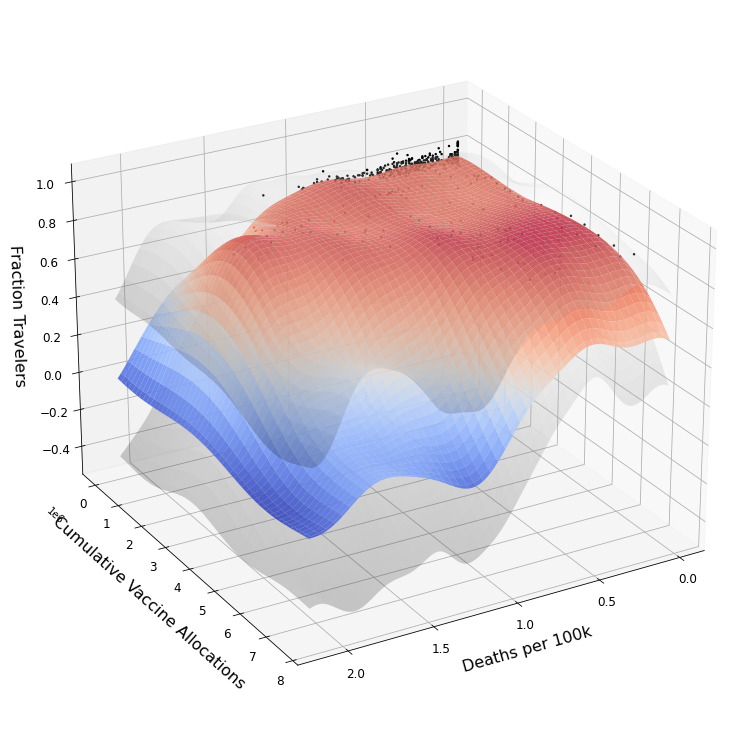

In [3]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

multi_gpr_wrapper(state_X, state_y.reset_index(drop=True), target="Population", plot=True)

In [4]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

multi_gpr_wrapper(fulton_X, fulton_y, "Population")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.05940257704891076


In [5]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(lowndes_X, lowndes_y, target="Population")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.06985144258556107


In [6]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(chatham_X, chatham_y, target="Population")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.06073697759347561


# Long Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.00037119021591139


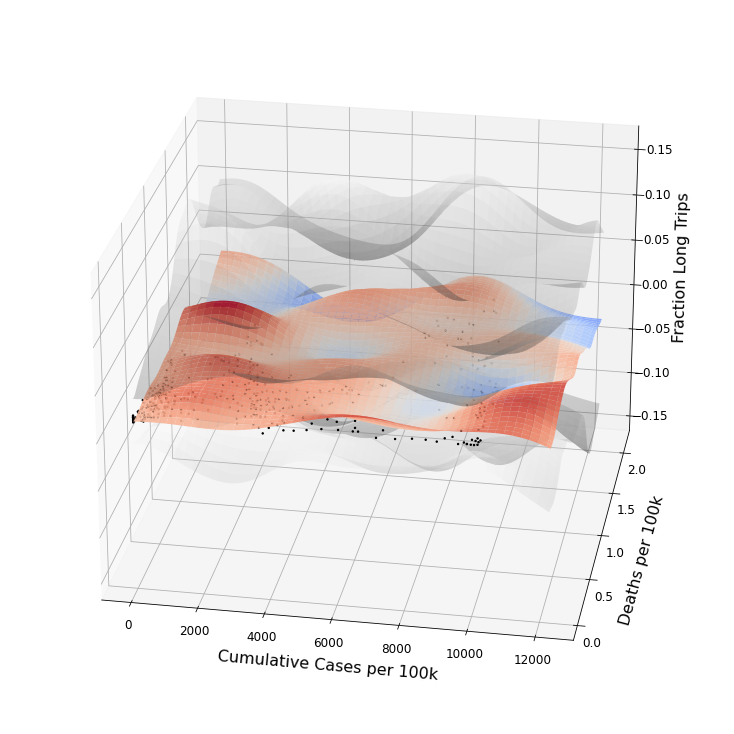

In [22]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(state_X, state_y.reset_index(drop=True),target="Long", plot=True, save=True)

In [8]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(fulton_X, fulton_y,target="Long")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0003313533791149409


In [9]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(lowndes_X, lowndes_y,target="Long")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0003775282696973711


In [10]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(chatham_X, chatham_y,target="Long")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.00028708937751092506


# Medium Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.007611440681017663


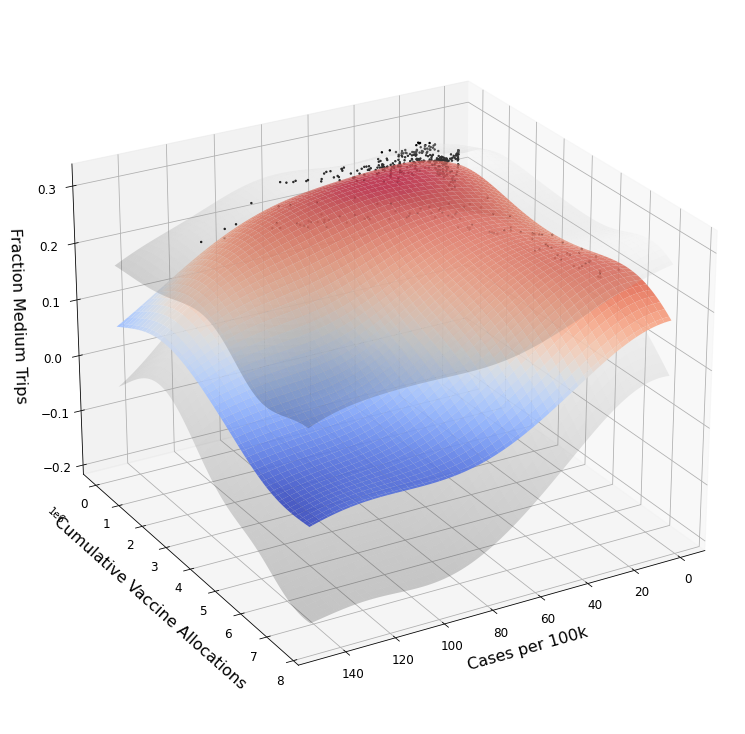

In [11]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(state_X, state_y.reset_index(drop=True), target="Medium", plot=True)

In [12]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(fulton_X, fulton_y, target="Medium")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.004629381716455973


In [13]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(lowndes_X, lowndes_y, target="Medium")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.005186743388544572


In [14]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(chatham_X, chatham_y, target="Medium")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.003960453431807712


# Short Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.06506229226884472


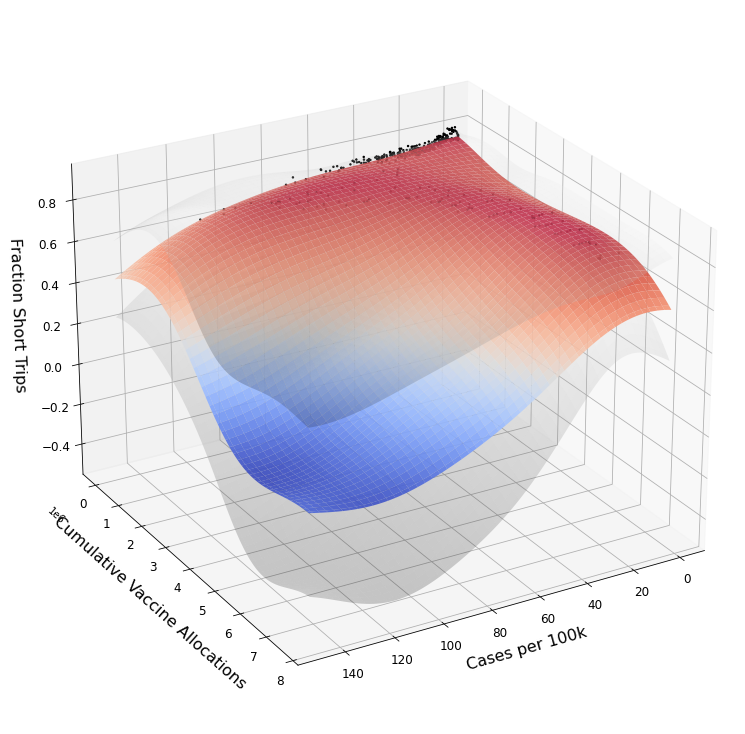

In [15]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(state_X, state_y.reset_index(drop=True), target="Short", plot=True)

In [16]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(fulton_X, fulton_y, target="Short")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.06828705633418146


In [17]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(lowndes_X, lowndes_y, target="Short")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.05869583809957245


In [18]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_gpr_wrapper(chatham_X, chatham_y, target="Short")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.06074389584730505
